In [1]:
%matplotlib inline

In [245]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pymultifracs.simul import fbm, mrw
from pathlib import Path
figure_folder = Path('figures/fBm/')
figure_folder.parent.mkdir(exist_ok=True)
figure_folder.mkdir(exist_ok=True)

In [258]:
import pymultifracs.psd as psd
from pymultifracs.mfa import mf_analysis_full
from pymultifracs.utils import build_q_log

In [4]:
sns.set_style('white')

In [5]:
sns.set_context('talk')

In [ ]:
import matplotlib as mpl

In [246]:
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'STIX Two Text'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['savefig.dpi'] = 600

In [7]:
palette = sns.color_palette('flare', n_colors=3)

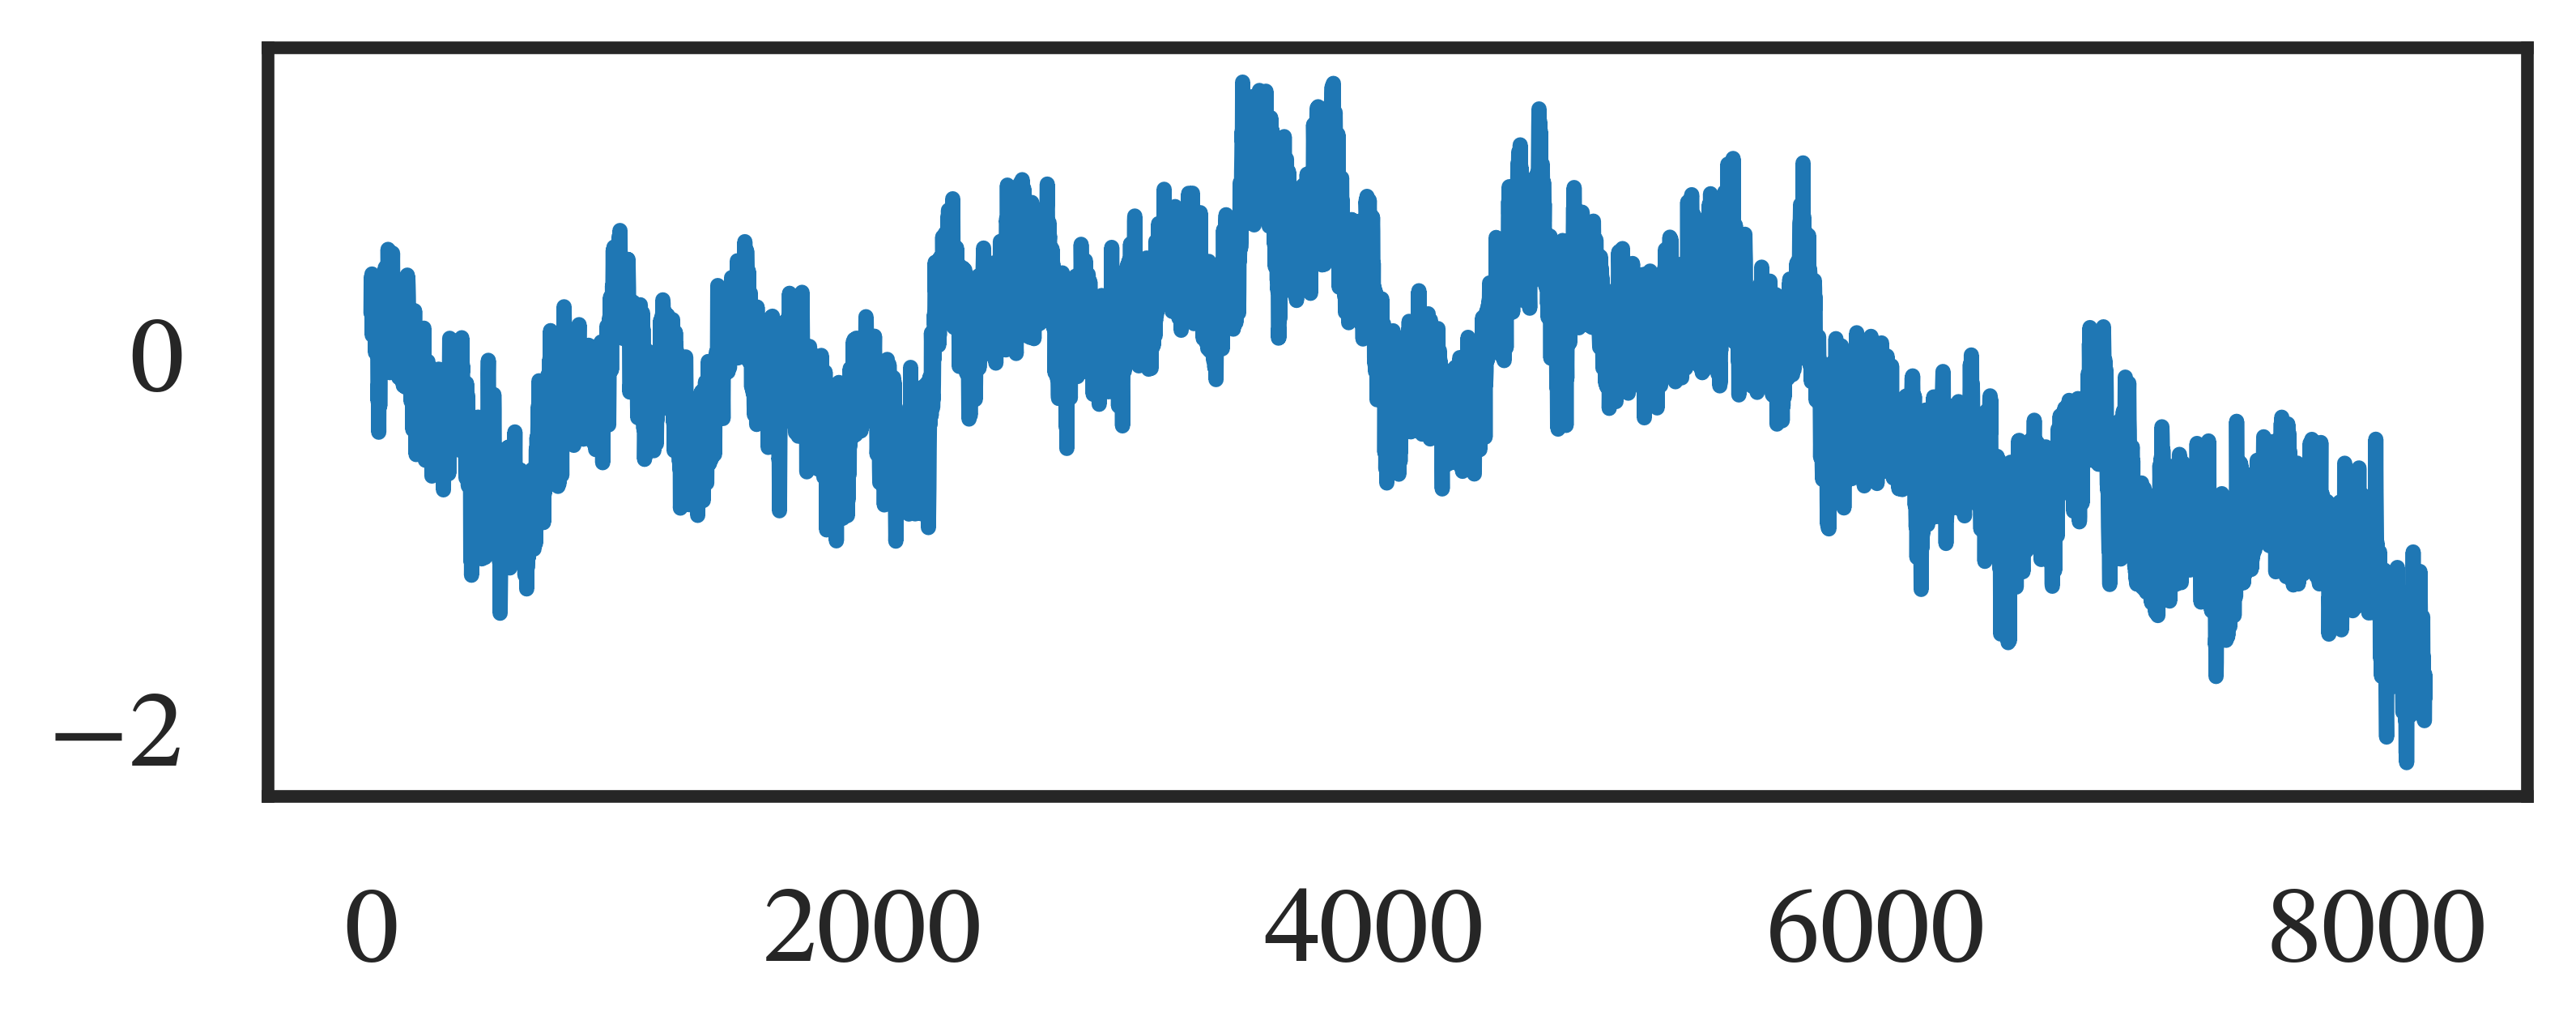

In [81]:
plt.figure(figsize=(6, 2))
plt.plot(fbm(shape=2 ** 13, H=.2))

In [175]:
X_fbm = np.diff(fbm(shape=2 ** 15, H=.75))

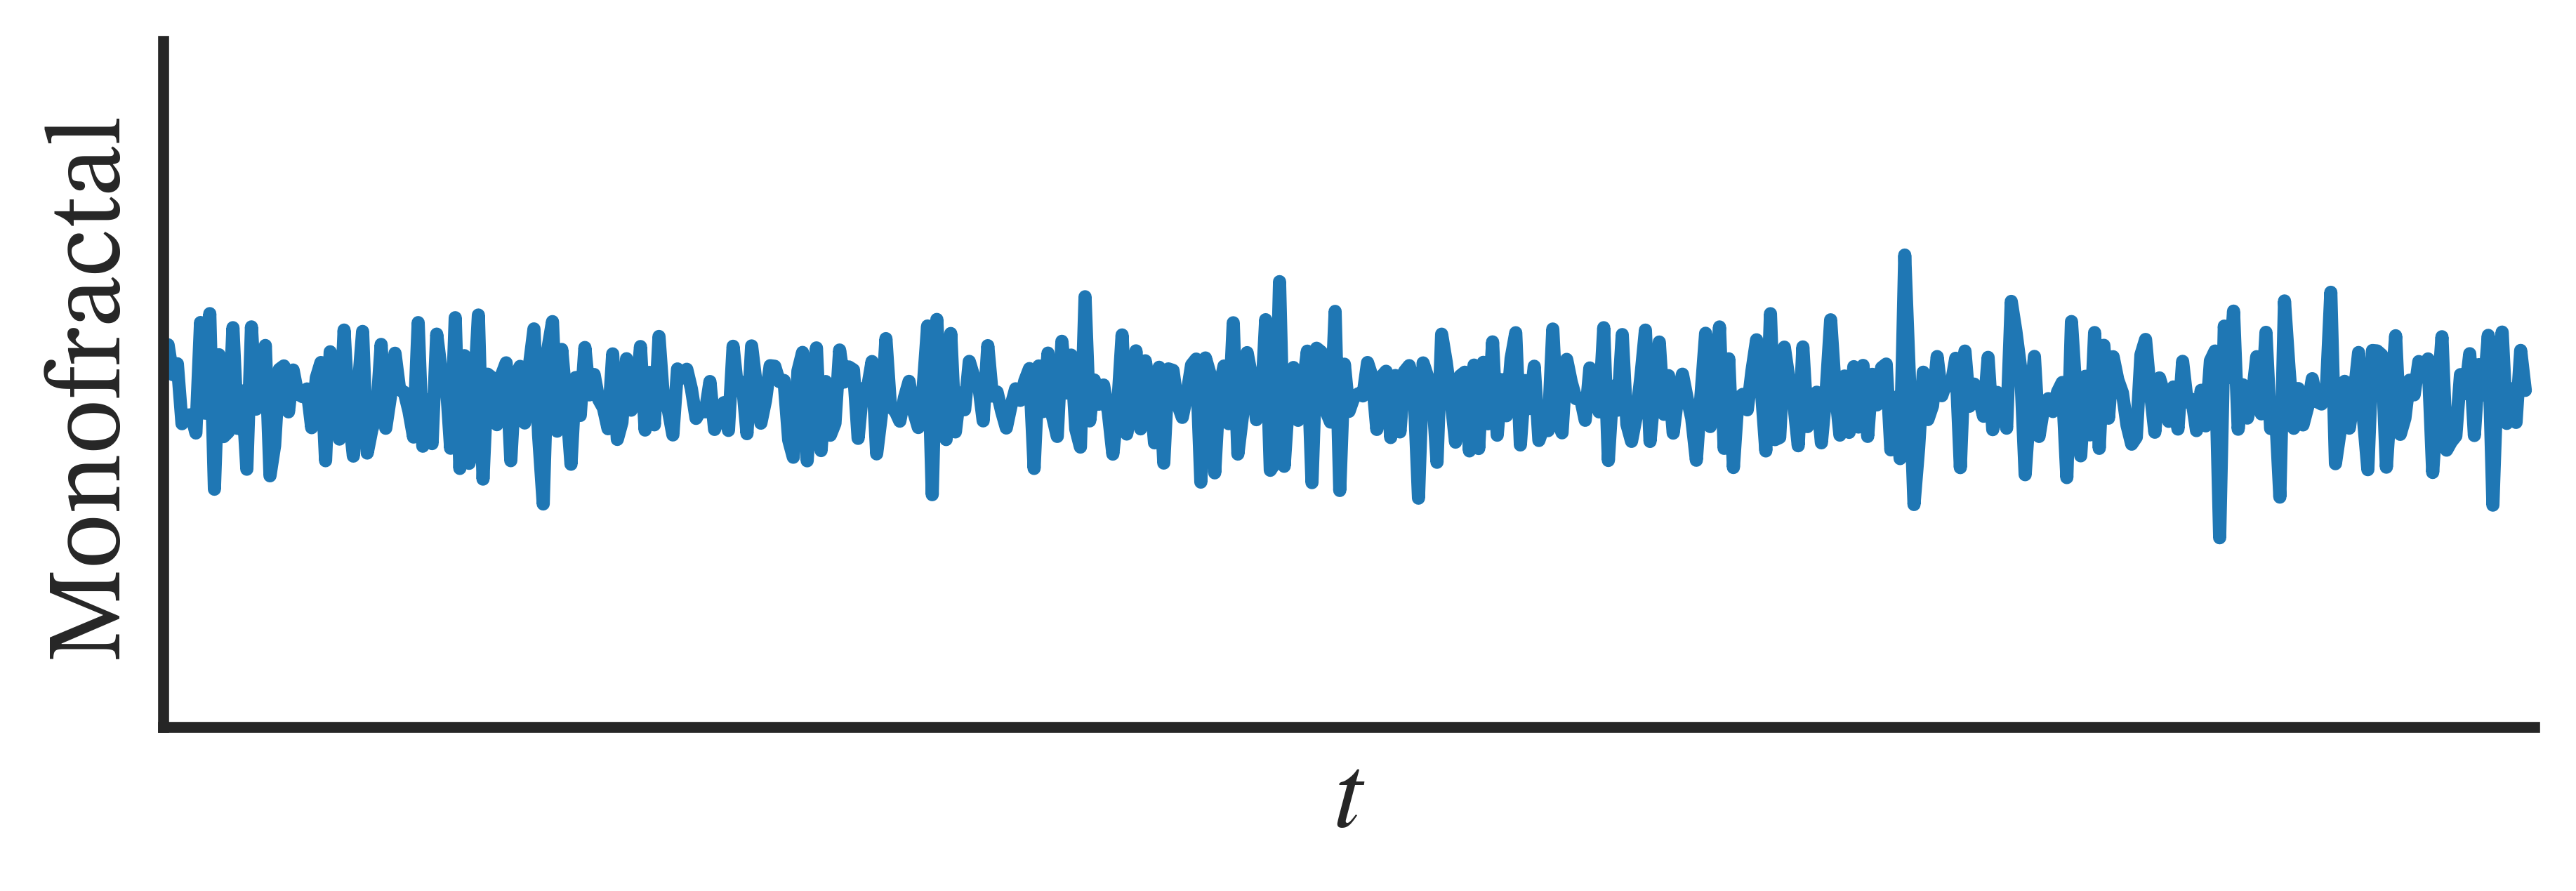

In [292]:
plt.figure(figsize=(6, 2), layout='constrained')
plt.plot(np.diff(X_fbm[:512]))
plt.gca().set(xticks=[], yticks=[], ylabel='Monofractal', xlabel='$t$',
              xlim=(0, X_fbm[:512].shape[0]), ylim = (X_fbm.min() - .0017, X_fbm.max() + .0017))
sns.despine()
plt.savefig(figure_folder / 'mono.pdf', dpi=600)
plt.savefig(figure_folder / 'mono.png', dpi=600)

In [236]:
# X_mrw = [np.diff(mrw(shape=8192, H=0.75, L=8192, lam=np.sqrt(c2))) for c2 in [.02, .06, .1]]
X_mrw = np.diff(mrw(shape=2**15, H=0.75, L=2**15, lam=np.sqrt(.05)))

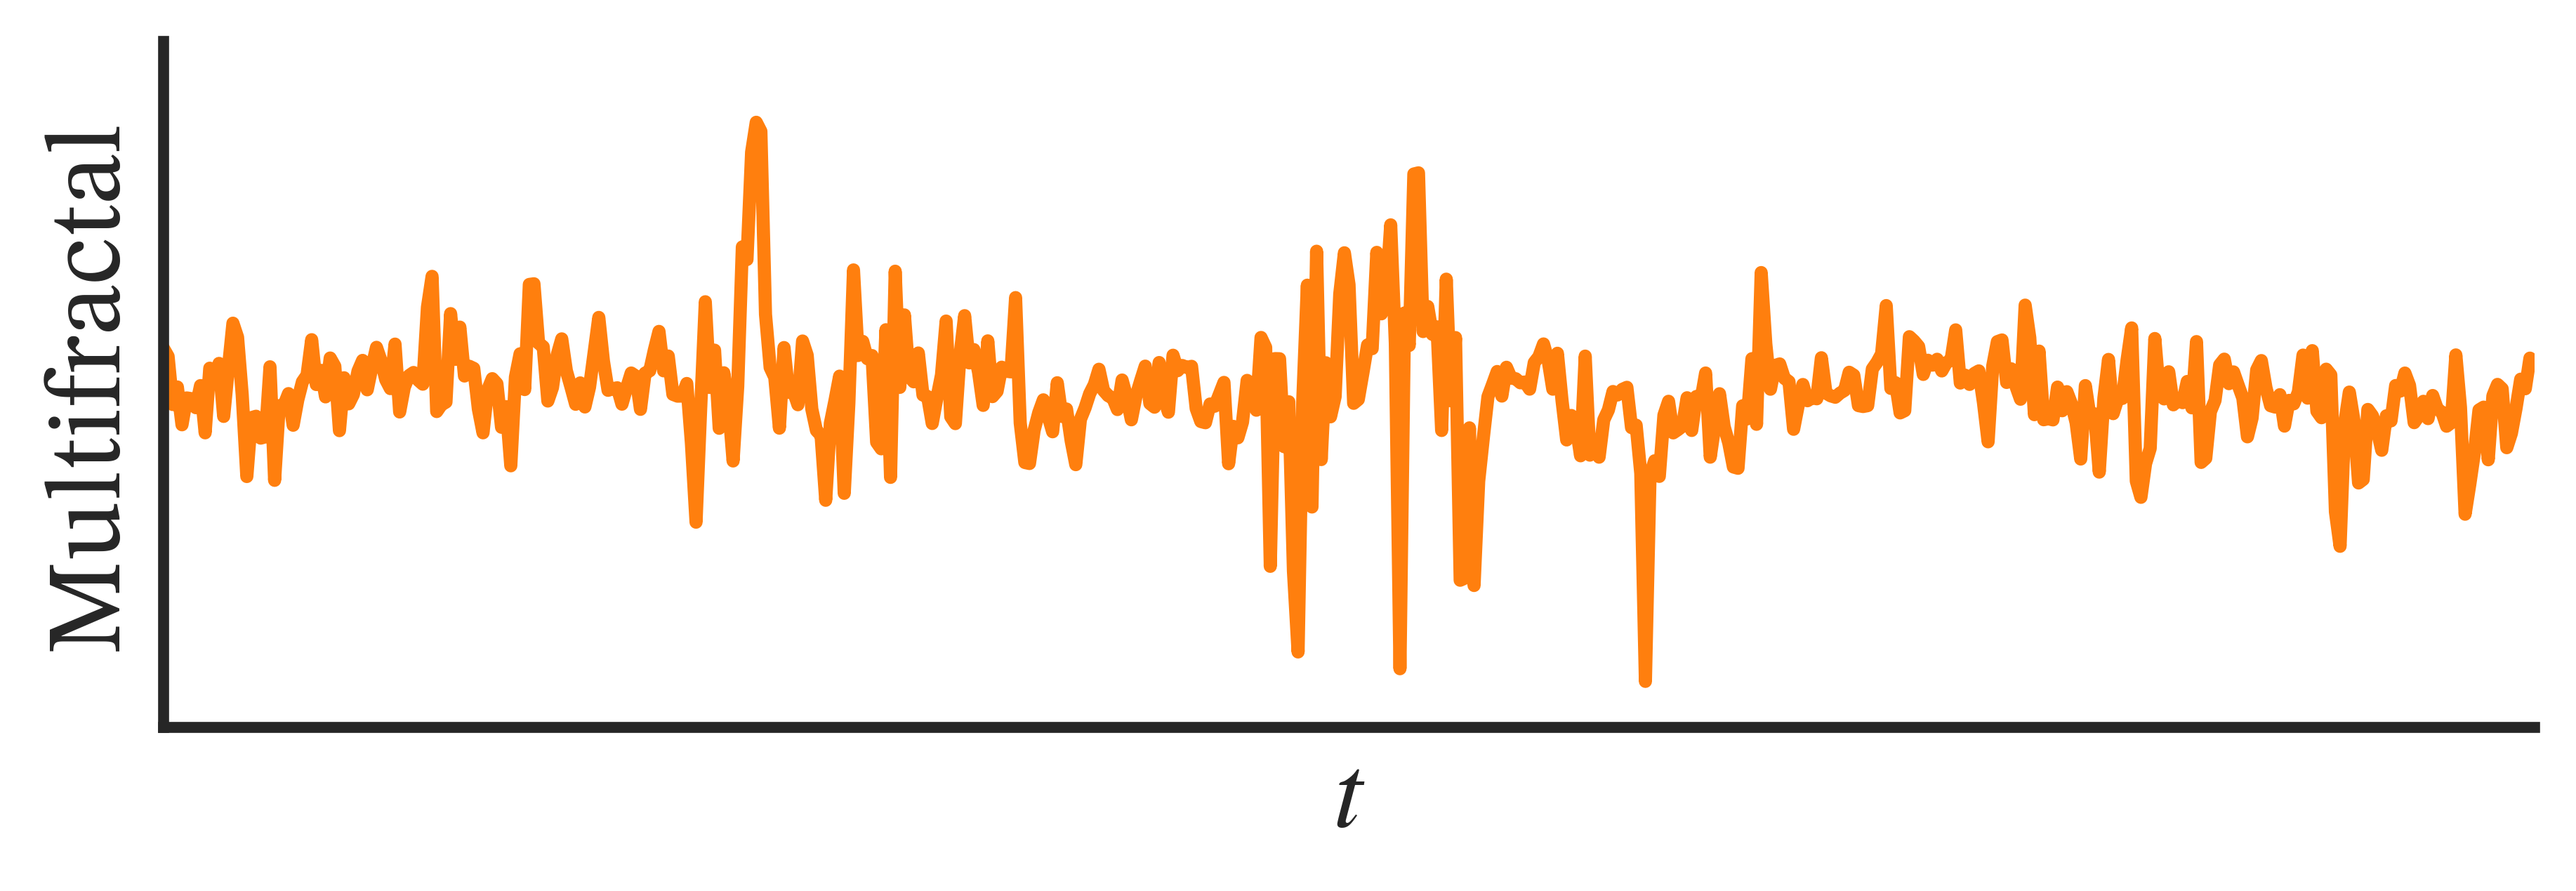

In [352]:
plt.figure(figsize=(6, 2), layout='constrained')
# plt.plot(X_mrw[0][:512] / X_mrw[0][:512].std())
# plt.plot(X_mrw[1][:512] / X_mrw[1][:512].std() - 10)
# plt.plot(X_mrw[2][:512] / X_mrw[2][:512].std() - 10 * 2)
plt.plot(X_mrw[:512] / X_mrw[:512].std(), color='C1')
plt.gca().set(xticks=[], yticks=[], ylabel='Multifractal', xlabel='$t$',
              xlim=(0, X_mrw[:512].shape[0]), ylim=(-6, 6))
sns.despine()
plt.savefig(figure_folder / 'multi.pdf')
plt.savefig(figure_folder / 'multi.png')

In [300]:
def bounding_polynomial(x_0, C, alpha, support):

    return C * abs(support - x_0) ** alpha

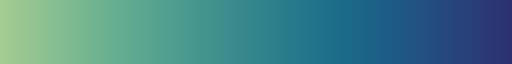

In [304]:
sns.color_palette('crest', as_cmap=True)

In [341]:
sns.color_palette('crest', n_colors=5)[:-2]

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

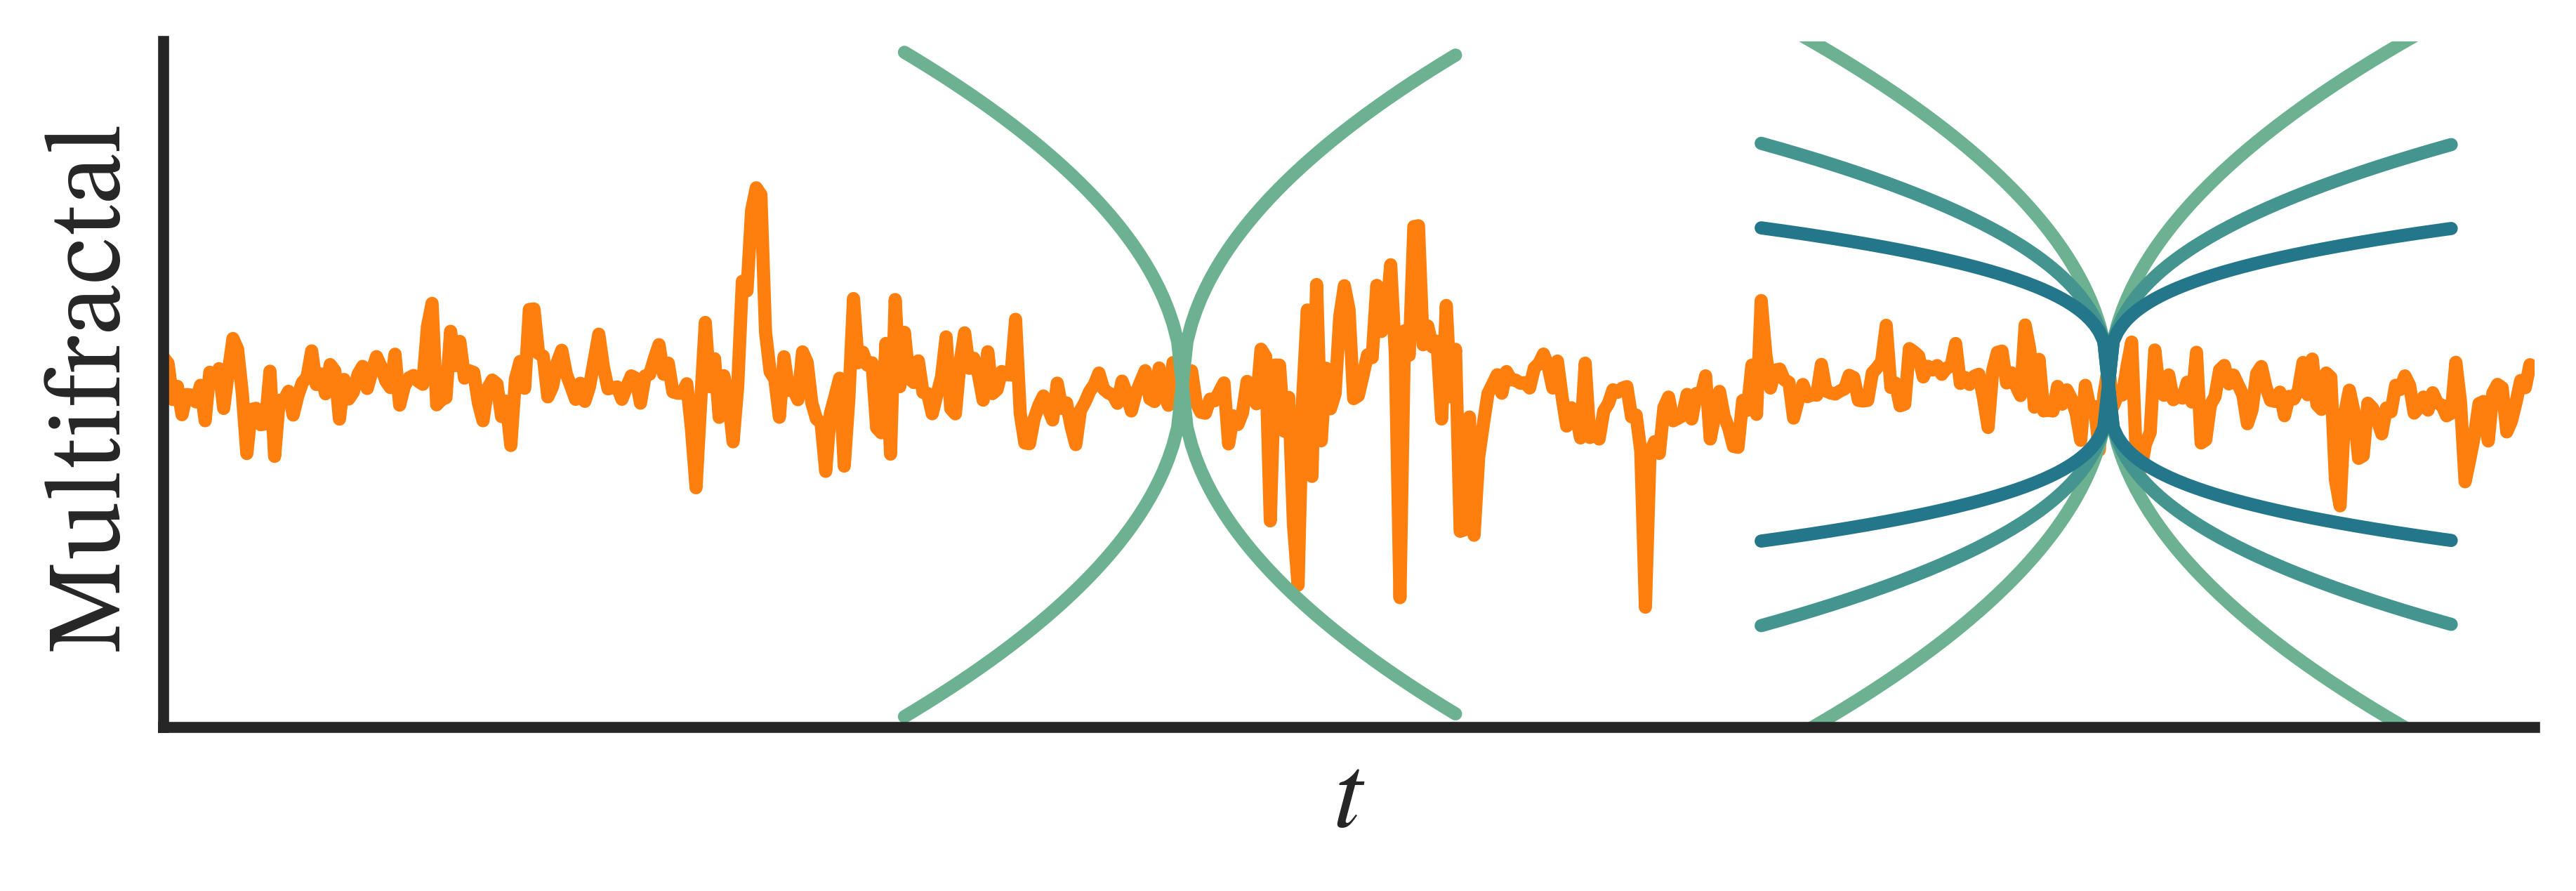

In [351]:
plt.figure(figsize=(6, 2), layout='constrained')
# plt.plot(X_mrw[0][:512] / X_mrw[0][:512].std())
# plt.plot(X_mrw[1][:512] / X_mrw[1][:512].std() - 10)
# plt.plot(X_mrw[2][:512] / X_mrw[2][:512].std() - 10 * 2)
plt.plot(X_mrw[:512] / X_mrw[:512].std(), color='C1')

color=sns.color_palette('crest', n_colors=4)[0]
center = 220
range = 60
support = np.arange(center-range, center+range)
plt.plot(support, bounding_polynomial(center, 1, .5, support), c=color)
plt.plot(support, -bounding_polynomial(center, 1, .50, support), c=color)

for alpha, color in zip([.5, .4, .3], sns.color_palette('crest', n_colors=4)[:-1]):
    center = 420
    range = 75
    support = np.arange(center-range, center+range)
    plt.plot(support, bounding_polynomial(center, 1, alpha, support), c=color)
    plt.plot(support, -bounding_polynomial(center, 1, alpha, support), c=color)

plt.gca().set(xticks=[], yticks=[], ylabel='Multifractal', xlabel='$t$',
              xlim=(0, X_mrw[:512].shape[0]), ylim=(-8, 8))
sns.despine()
plt.savefig(figure_folder / 'multi_hoelder.pdf')
plt.savefig(figure_folder / 'multi_hoelder.png')

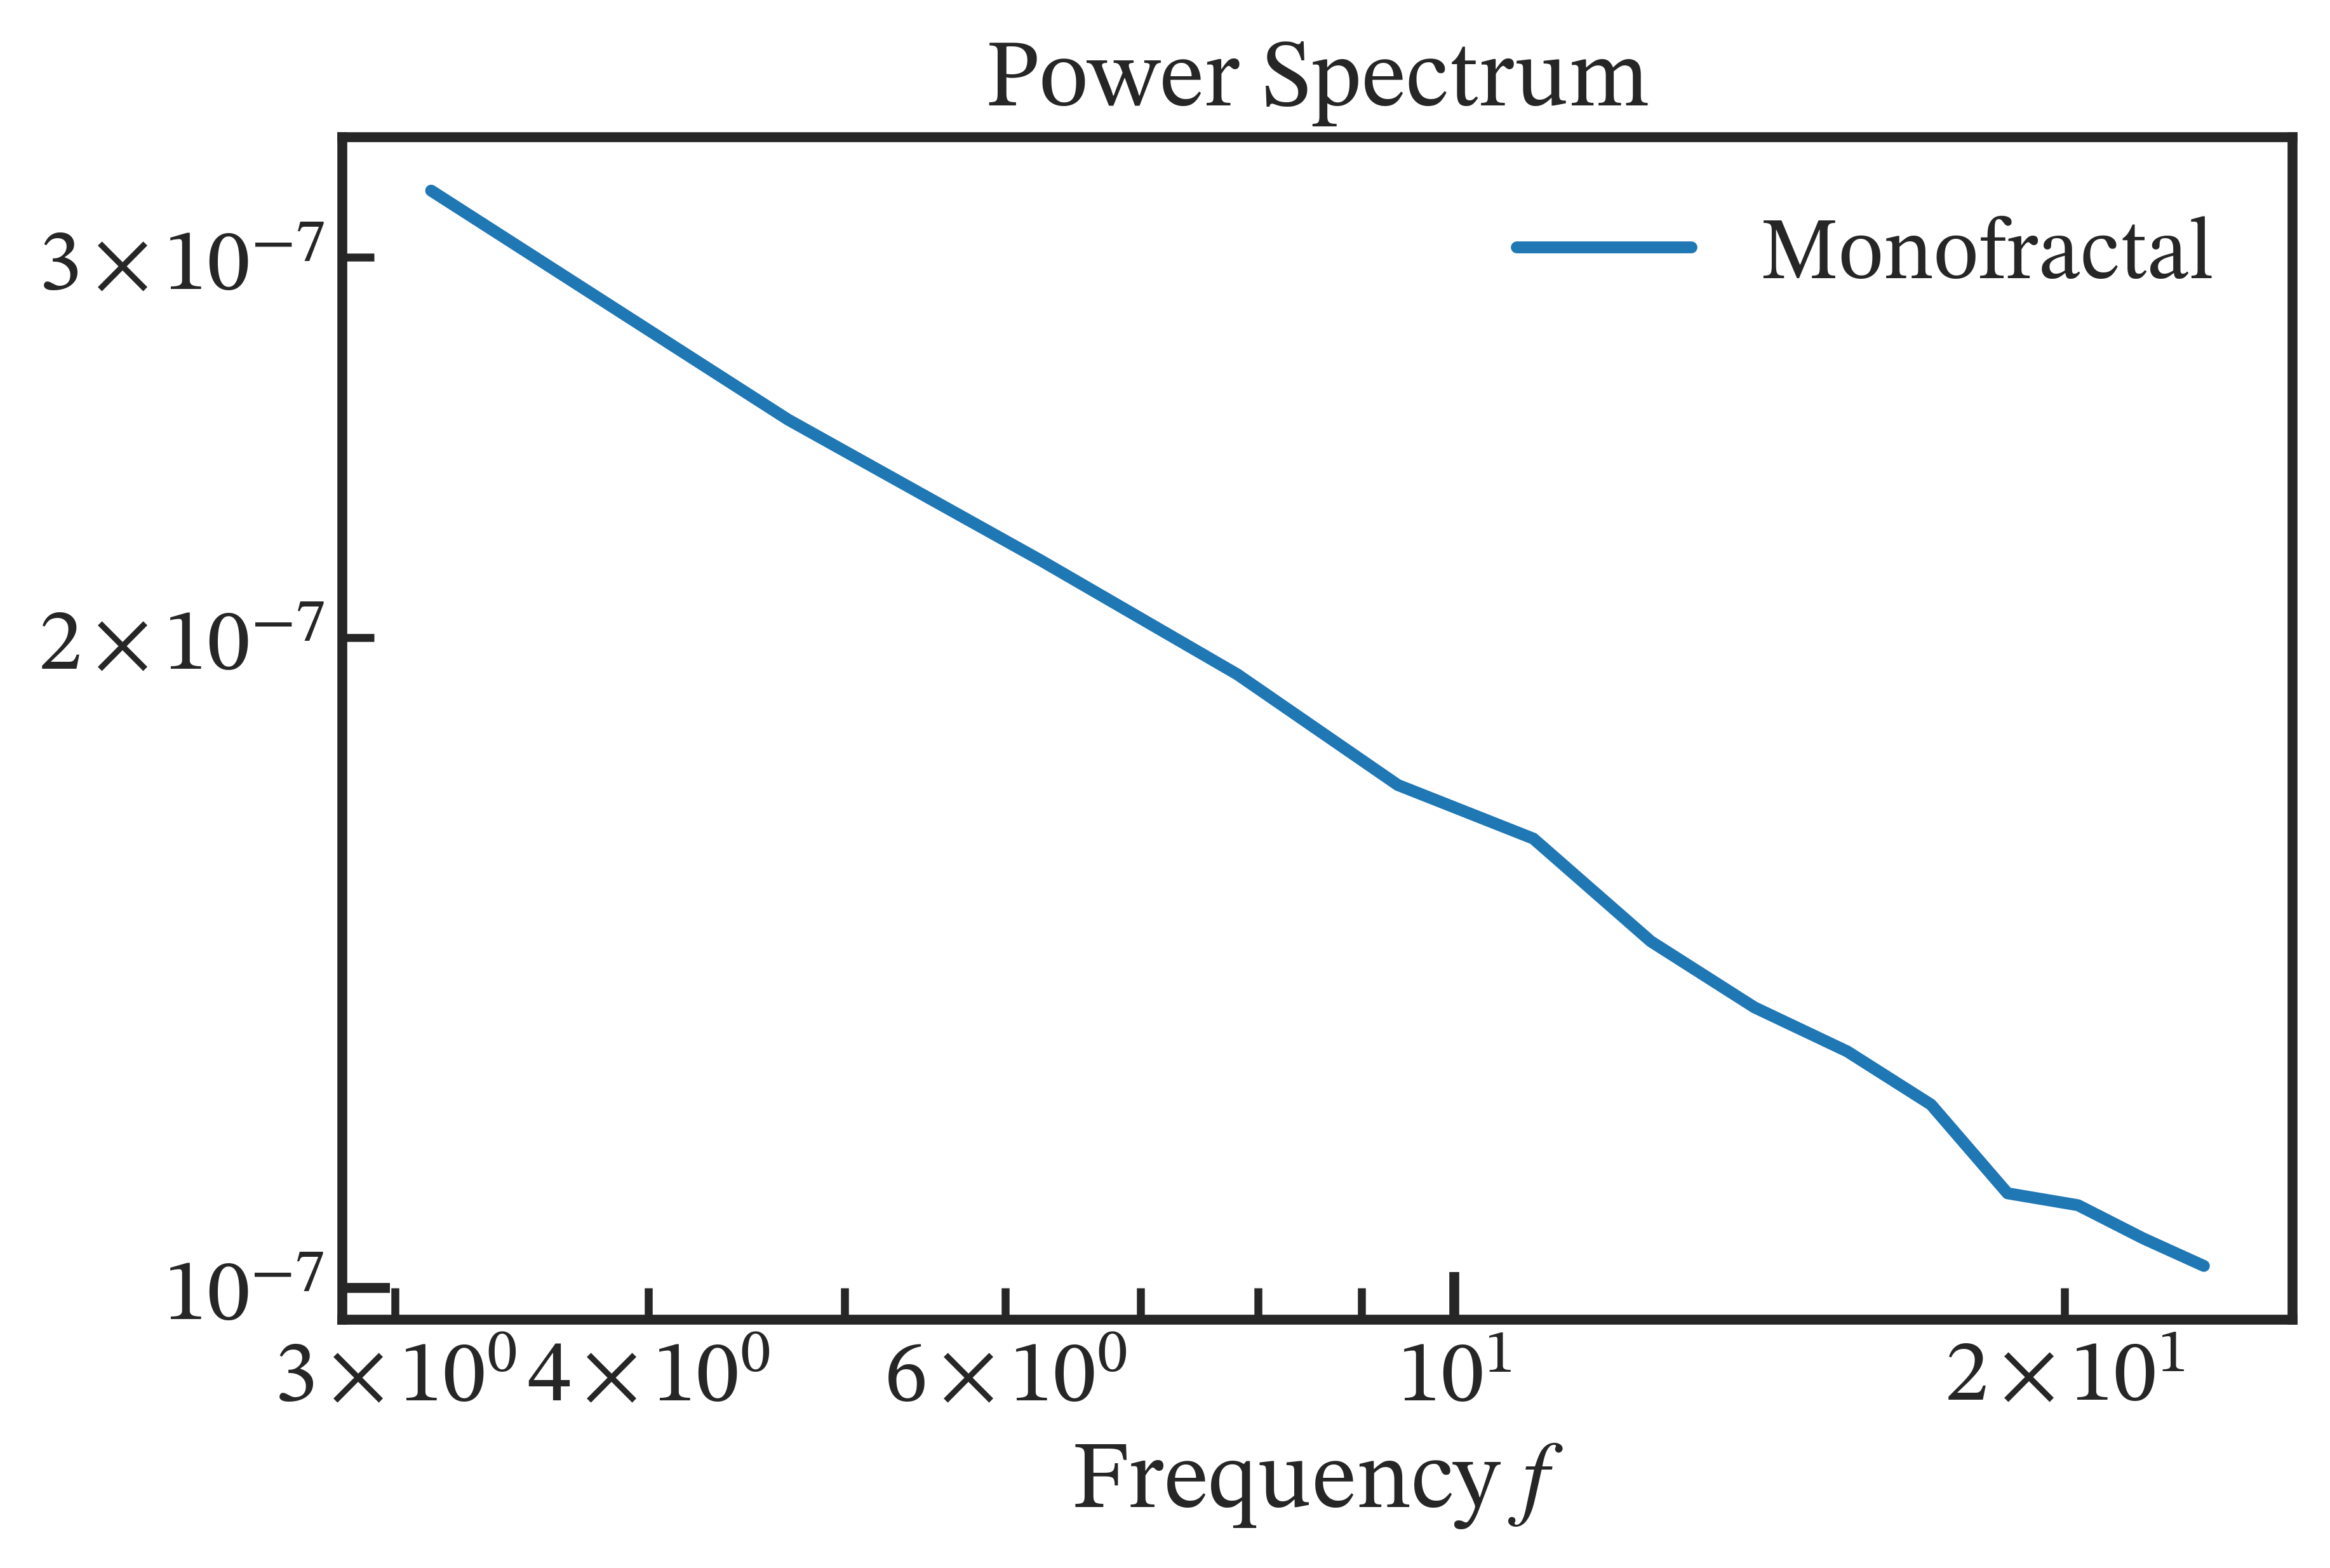

In [297]:
p_fbm = psd.welch_estimation(X_fbm, 50, n_fft=2 ** 5)
p_mrw = psd.welch_estimation(X_mrw, 50, n_fft=2 ** 5)

plt.figure(figsize=(6, 4), layout='constrained')
plt.loglog(p_fbm.freq[2:-1], p_fbm.psd[2:-1], label='Monofractal')
# plt.loglog(p_mrw.freq[2:-1], p_mrw.psd[2:-1] / 1.5, label='Multifractal')
plt.gca().tick_params(bottom=True, which='both', direction='in', left=True)
plt.gca().set(xlabel='Frequency $f$', title='Power Spectrum')
plt.legend(frameon=False)
plt.savefig(figure_folder / 'PSD_mono.png')

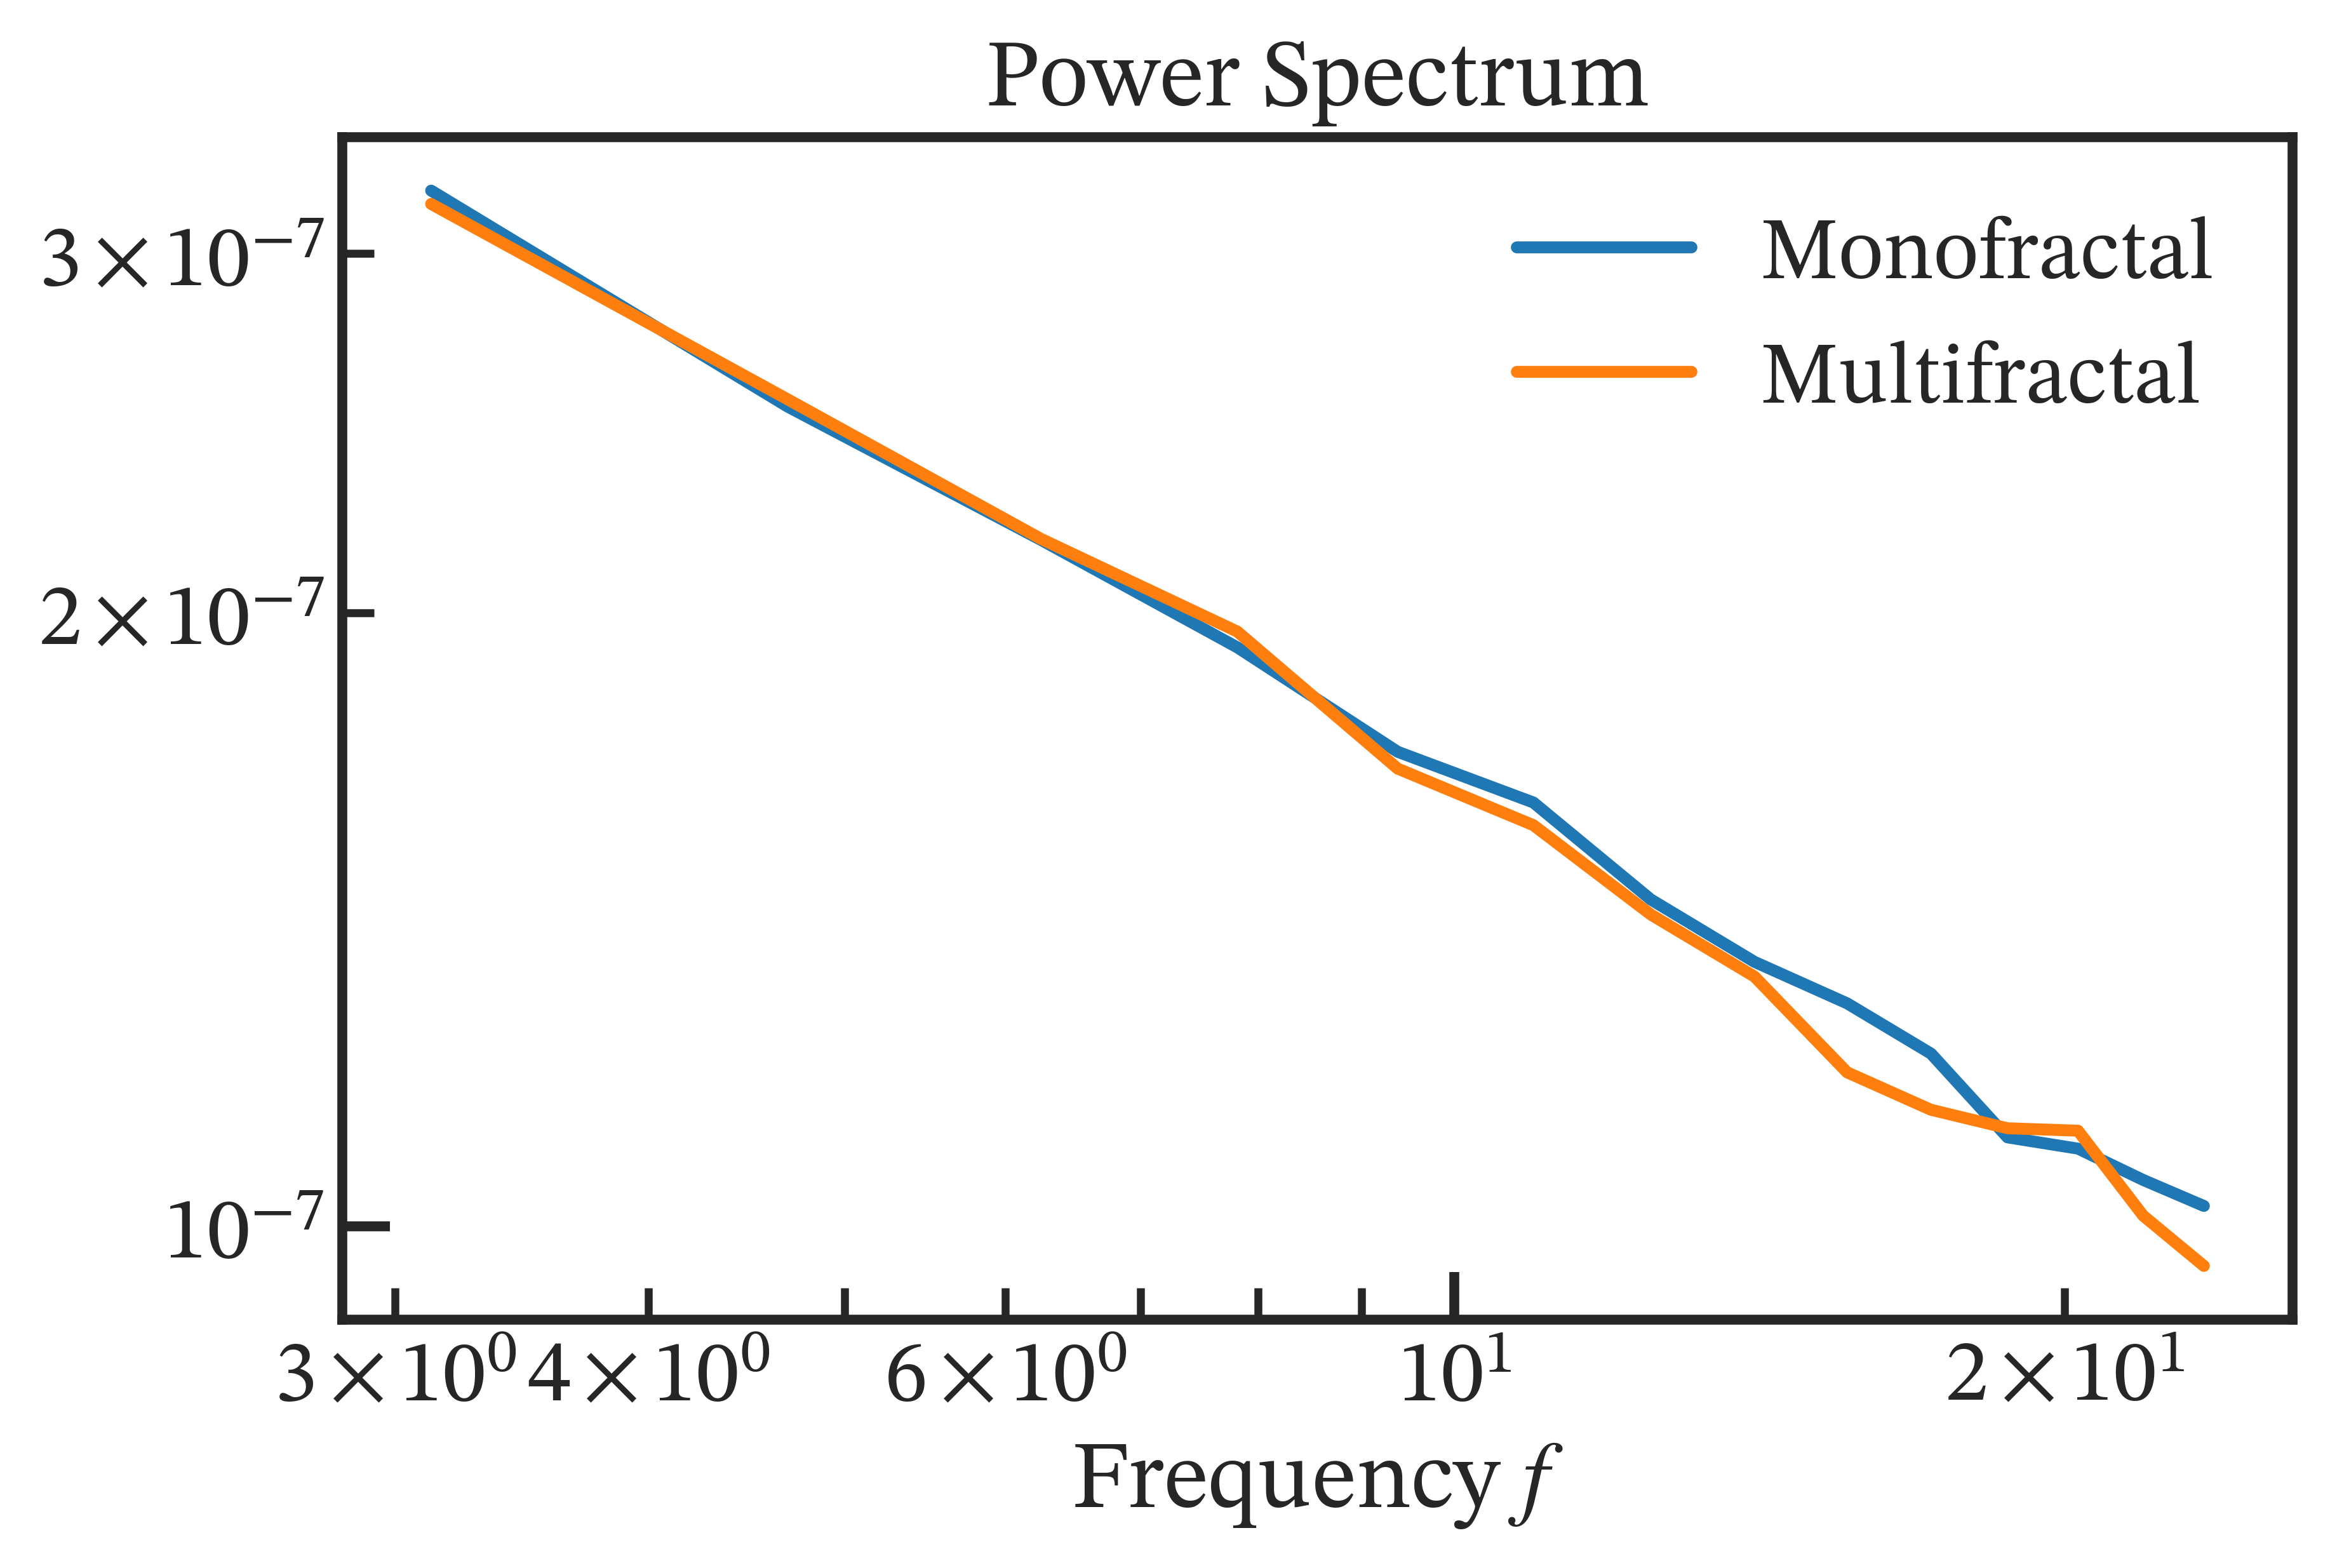

In [295]:
p_fbm = psd.welch_estimation(X_fbm, 50, n_fft=2 ** 5)
p_mrw = psd.welch_estimation(X_mrw, 50, n_fft=2 ** 5)

plt.figure(figsize=(6, 4), layout='constrained')
plt.loglog(p_fbm.freq[2:-1], p_fbm.psd[2:-1], label='Monofractal')
plt.loglog(p_mrw.freq[2:-1], p_mrw.psd[2:-1] / 1.5, label='Multifractal')
plt.gca().tick_params(bottom=True, which='both', direction='in', left=True)
plt.gca().set(xlabel='Frequency $f$', title='Power Spectrum')
plt.legend(frameon=False)
plt.savefig(figure_folder / 'PSD_both.pdf')
plt.savefig(figure_folder / 'PSD_both.png')

In [265]:
h = np.linspace(0, 1.5, 100)

c2 = -0.05
c1 = 0.75 - c2
D = 1 - (((h - c1) ** 2) / (2 * abs(c2)))

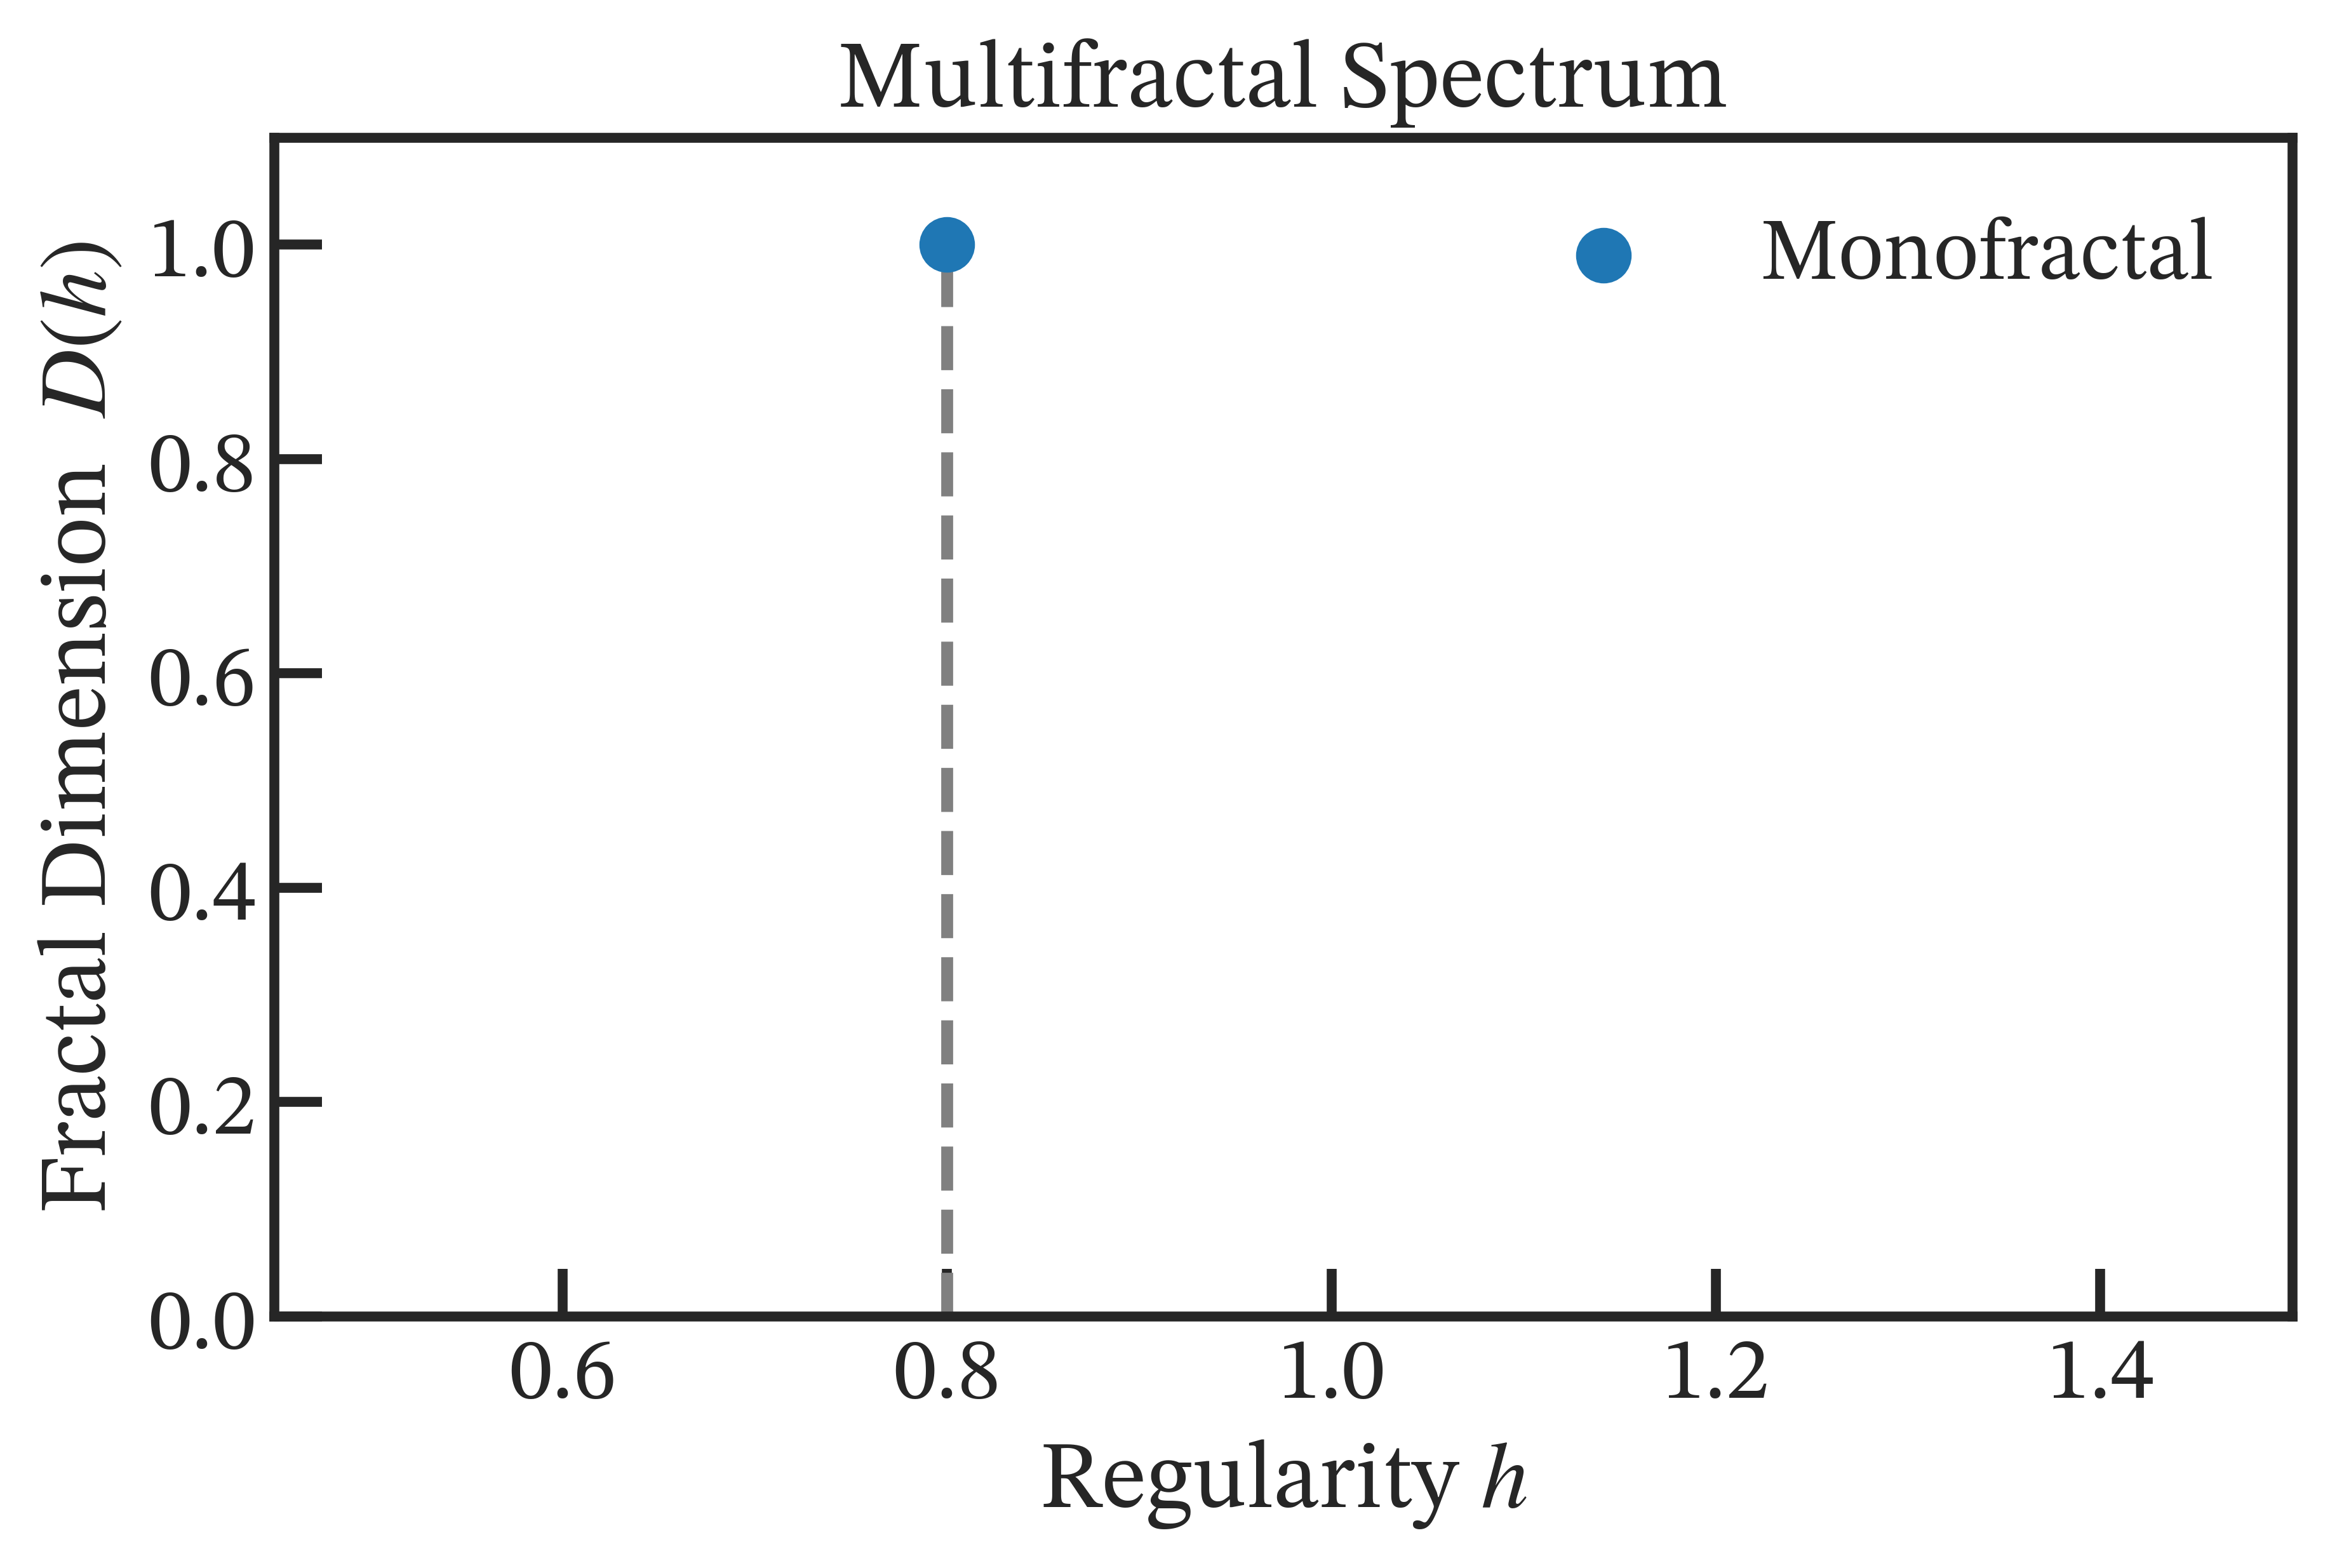

In [298]:
plt.figure(figsize=(6, 4), layout='constrained')

plt.vlines(c1, 0, 1, linestyles='dashed', colors='grey')
plt.scatter(c1, 1, zorder=3, label='Monofractal')
# plt.plot(h, D, color='C1', zorder=2, label='Multifractal')
plt.gca().set(ylim=(0, 1.1), xlabel='Regularity $h$', ylabel='Fractal Dimension  $D(h)$', title='Multifractal Spectrum', xlim=(.45, 1.5), )
plt.gca().tick_params(bottom=True, which='both', direction='in', left=True)
plt.legend(frameon=False)
plt.savefig(figure_folder / 'mfs_mono.png')

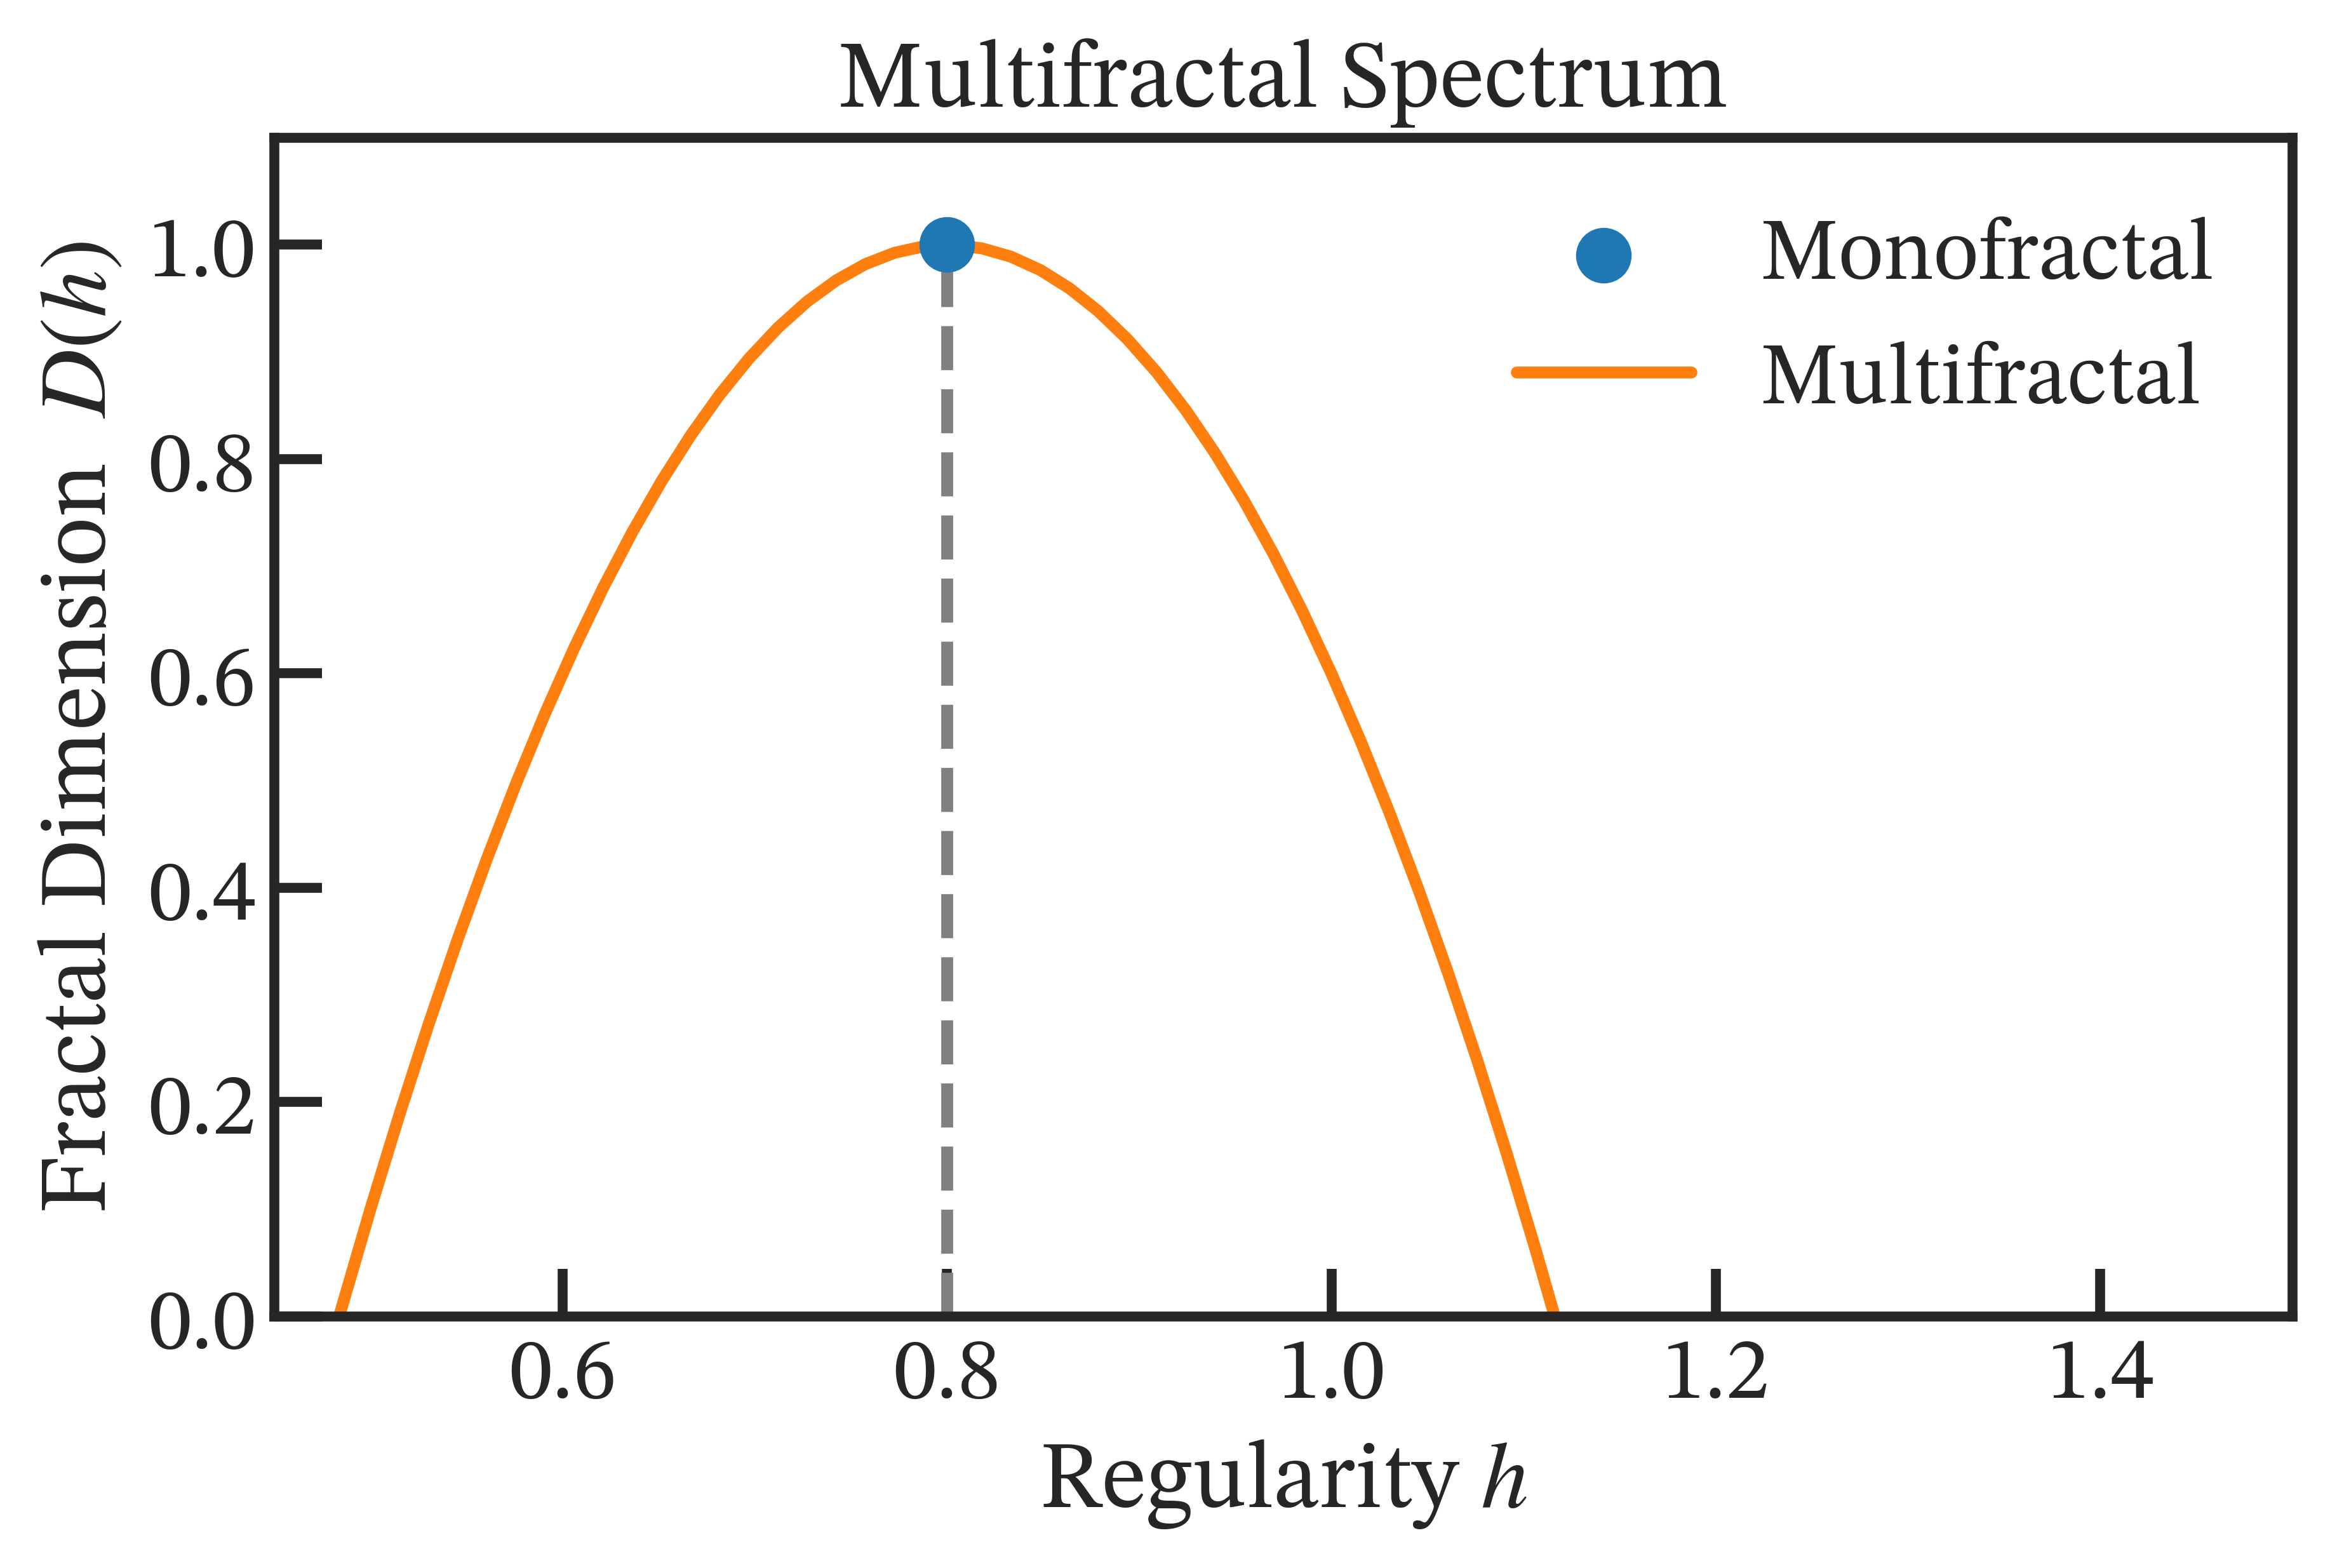

In [296]:
plt.figure(figsize=(6, 4), layout='constrained')

plt.vlines(c1, 0, 1, linestyles='dashed', colors='grey')
plt.scatter(c1, 1, zorder=3, label='Monofractal')
plt.plot(h, D, color='C1', zorder=2, label='Multifractal')
plt.gca().set(ylim=(0, 1.1), xlabel='Regularity $h$', ylabel='Fractal Dimension  $D(h)$', title='Multifractal Spectrum', xlim=(.45, 1.5), )
plt.gca().tick_params(bottom=True, which='both', direction='in', left=True)
plt.legend(frameon=False)
plt.savefig(figure_folder / 'mfs_both.pdf')
plt.savefig(figure_folder / 'mfs_both.png')

In [357]:
dwt, lwt = mf_analysis_full(X_mrw, [(3, 10)], gamint=1, p_exp=2, q=build_q_log(1, 15, 30))

In [359]:
from pymultifracs.viz import plot_coef
from pymultifracs.wavelet import wavelet_analysis

In [360]:
WT = wavelet_analysis(X_mrw, p_exp=2, j1=3, j2=10, gamint=1)

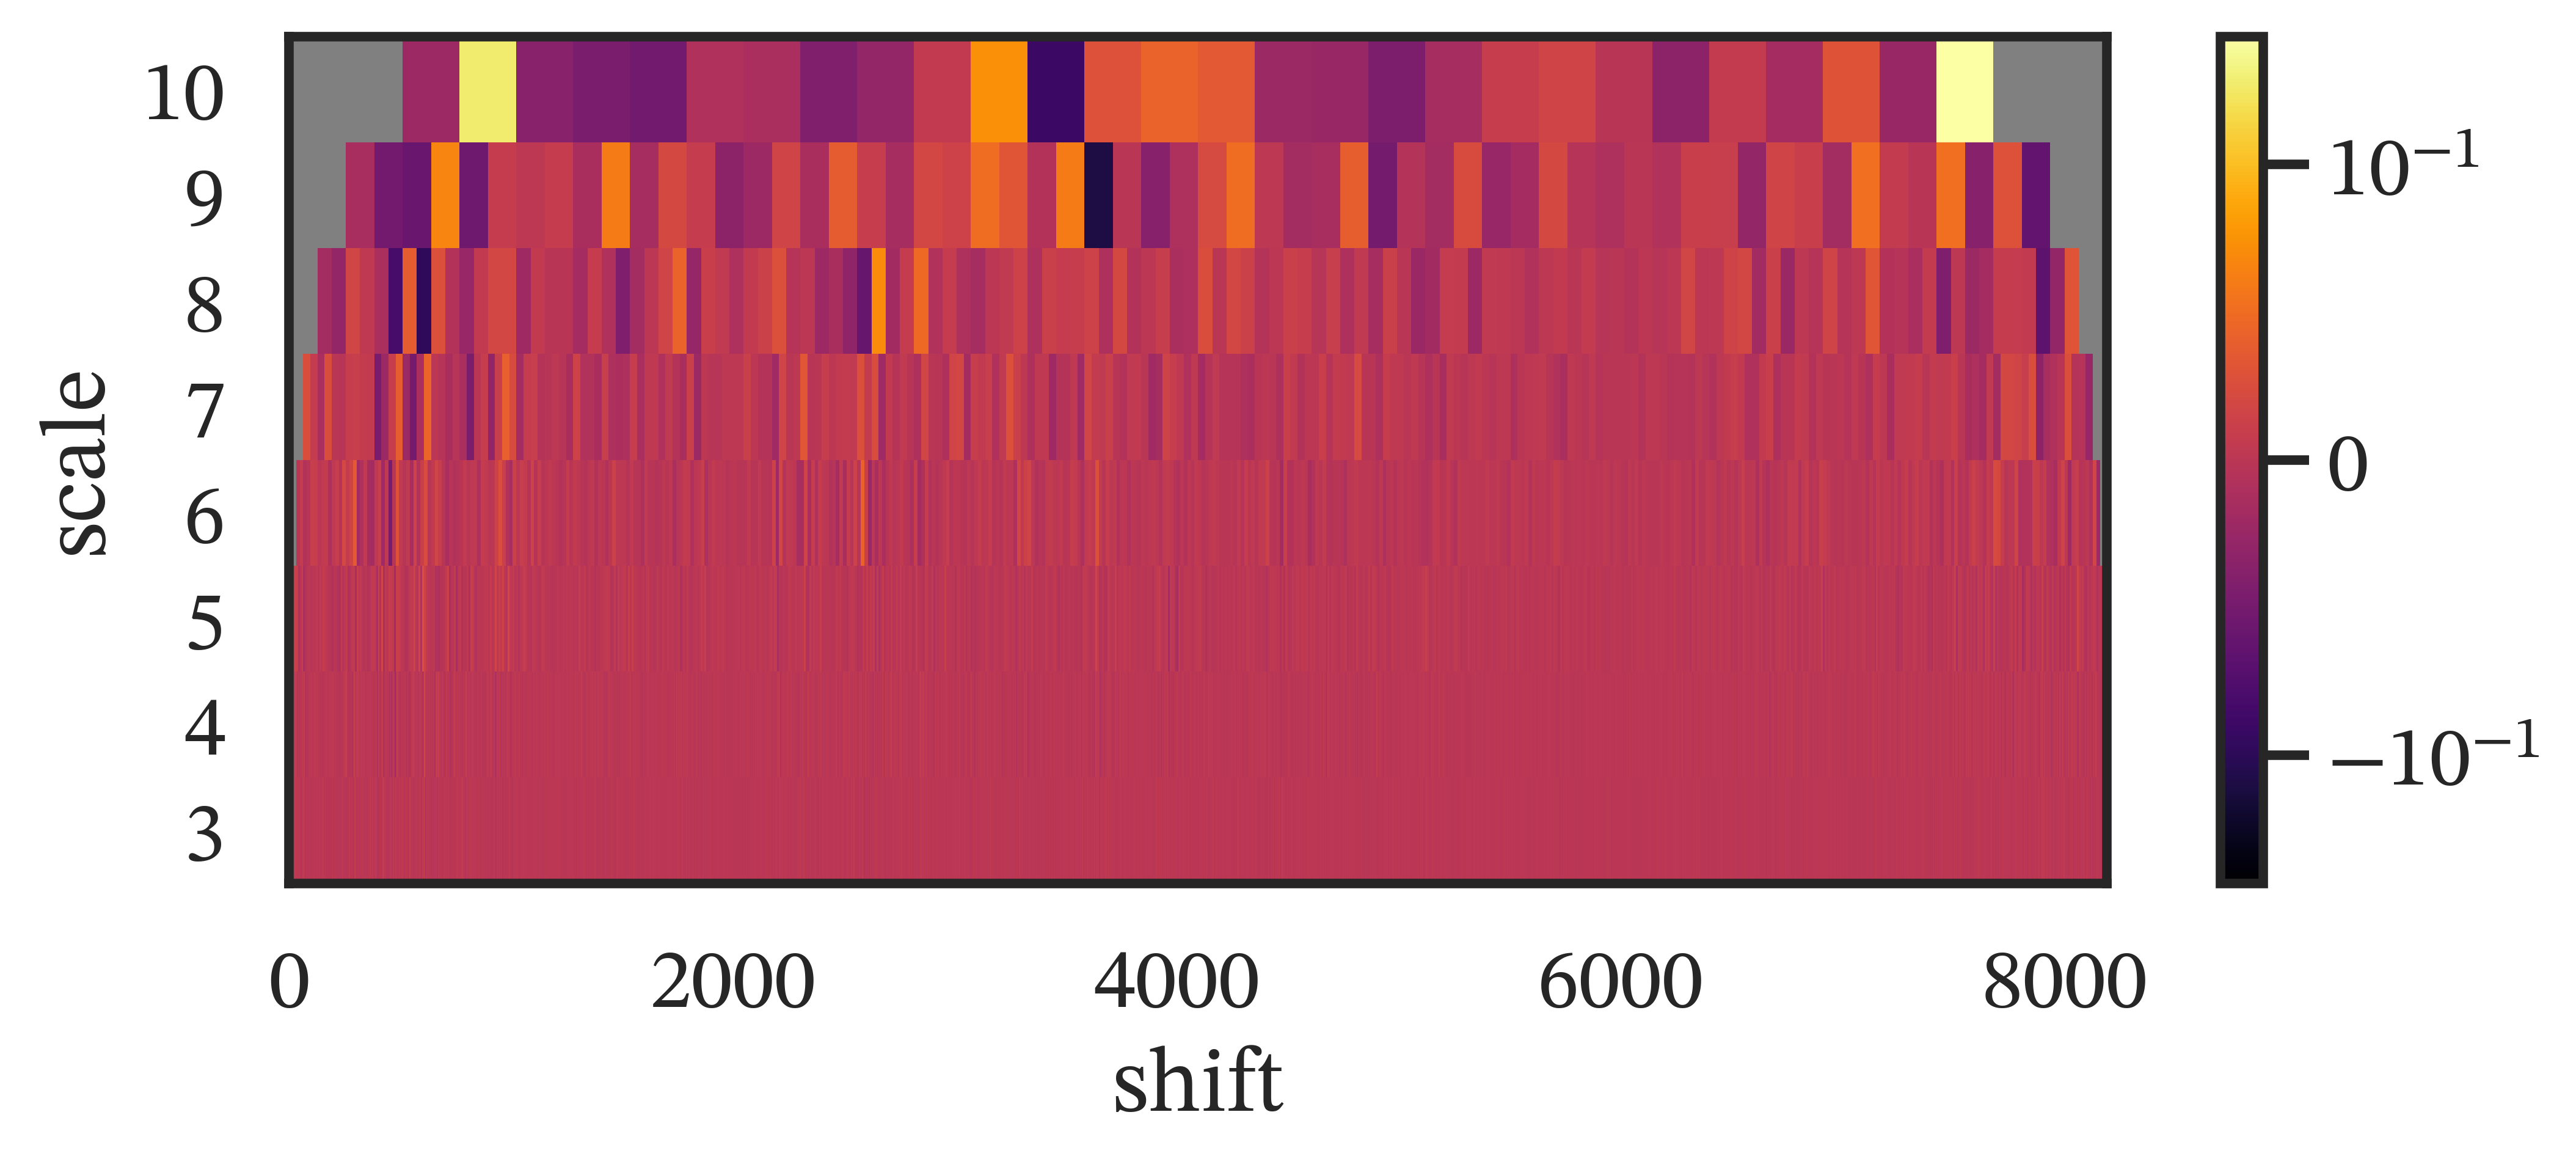

In [366]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_coef(WT.wt_coefs.values, 3, 10, leader=False, ax=ax)

In [354]:
?mf_analysis_full

Signature:
mf_analysis_full(
    signal,
    scaling_ranges,
    normalization=1,
    gamint=0.0,
    weighted=None,
    wt_name='db3',
    p_exp=None,
    q=None,
    n_cumul=3,
    bootstrap_weighted=None,
    estimates='scm',
    R=1,
)
Docstring:
Perform multifractal analysis on a signal.

.. note:: This function combines wavelet analysis and multifractal analysis
          for practicality.
          The use of parameters is better described in their
          respective functions

Parameters
----------
signal : ndarray, shape (n_samples,)
    The signal to perform the analysis on.
j1 : int
    Minimum scale to perform fit on.
j2 : int
    Maximum sacle to perform fit on.
normalization : int
    Norm to use, by default 1.
gamint : float
    Fractional integration coefficient, by default set to 0.
    To understand how to specify gamint, see ~
weighted : str | None
    Whether to perform a weighted linear regression, by default None.
wt_name : str, optional
    Name of the wavelet 

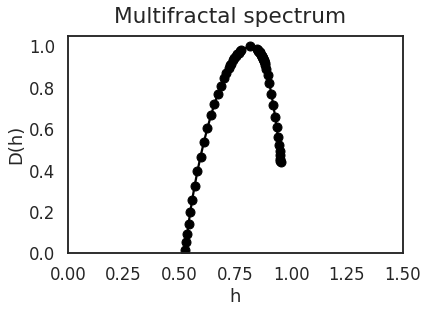

In [ ]:
# plt.figure(figsize=(10, 7))
lwt.spectrum.plot()
plt.ylim((0, 1.05))
plt.xlim((0, 1.5))
plt.suptitle('Multifractal spectrum')
plt.title('')
plt.savefig('figures/mfs.pdf')
plt.show()

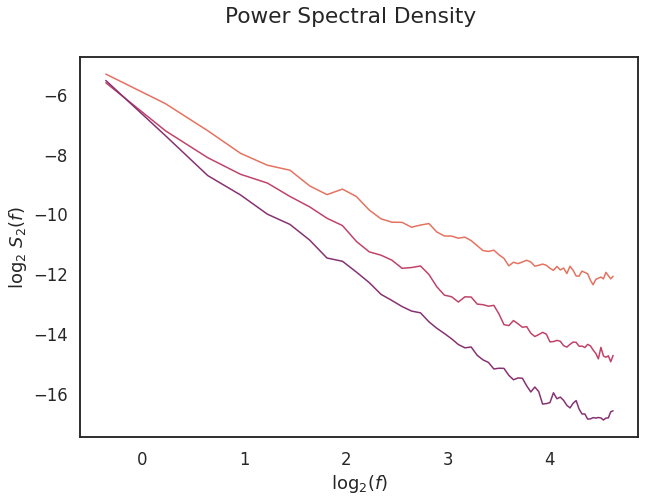

In [ ]:
plt.figure(figsize=(10, 7))
for i, x in enumerate(X):
    P = psd.welch_estimation(x, 50, n_fft=128)
    psd.log_plot([P.freq[2:-1]], [P.psd[2:-1]], color=(palette[i],))
plt.xlabel(r'$\log_2(f)$')
plt.ylabel(r'$\log_2 \ S_2(f)$')
plt.suptitle('Power Spectral Density')
plt.title('')
plt.savefig('figures/PSD_mono.pdf')

In [8]:
X = [fbm(shape=512, H=H) for H in [0.4, 0.5, 0.6]]
X[0] /= 1.4
X[2] *= 1.5

FileNotFoundError: [Errno 2] No such file or directory: 'figures/monofractals.pdf'

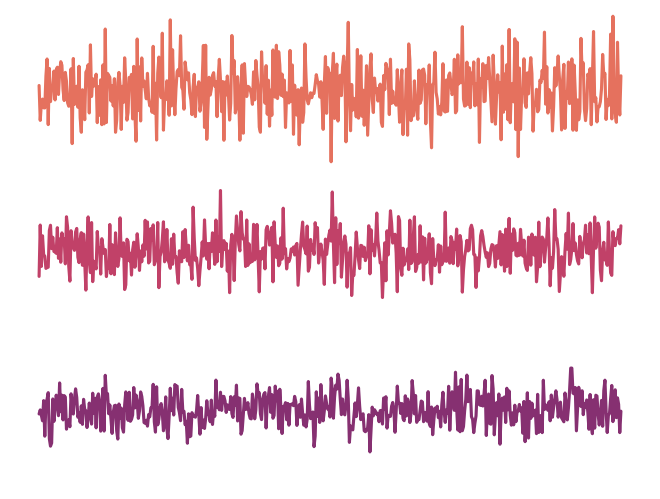

In [9]:
fig, ax = plt.subplots(3, 1)
for i, x in enumerate(X):
    ax[i].plot(np.diff(x), c=palette[i])
    ax[i].axis('off')

plt.subplots_adjust(hspace=0, left=0, right=1, top=1, bottom=0)

ax[1].set_ylim(ax[0].get_ylim())
ax[2].set_ylim(ax[0].get_ylim())

plt.savefig('figures/monofractals.pdf')
plt.show()

In [250]:
X = [fbm(shape=8192, H=H) for H in [0.3, 0.5, 0.7]]
X[0] /= 3
X[2] *= 3.5

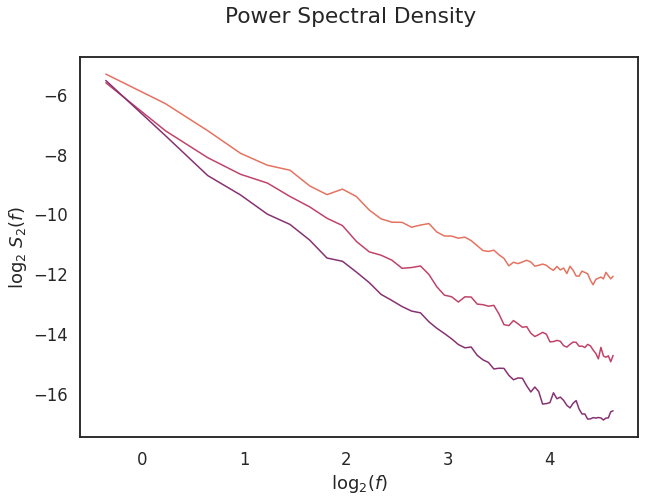

In [252]:
plt.figure(figsize=(10, 7))
for i, x in enumerate(X):
    P = psd.welch_estimation(x, 50, n_fft=128)
    psd.log_plot([P.freq[2:-1]], [P.psd[2:-1]], color=(palette[i],))
plt.xlabel(r'$\log_2(f)$')
plt.ylabel(r'$\log_2 \ S_2(f)$')
plt.suptitle('Power Spectral Density')
plt.title('')
plt.savefig('figures/PSD_mono.pdf')

In [253]:
size = 19

In [335]:
X = np.diff(fbm(shape=2 ** size, H=0.5))

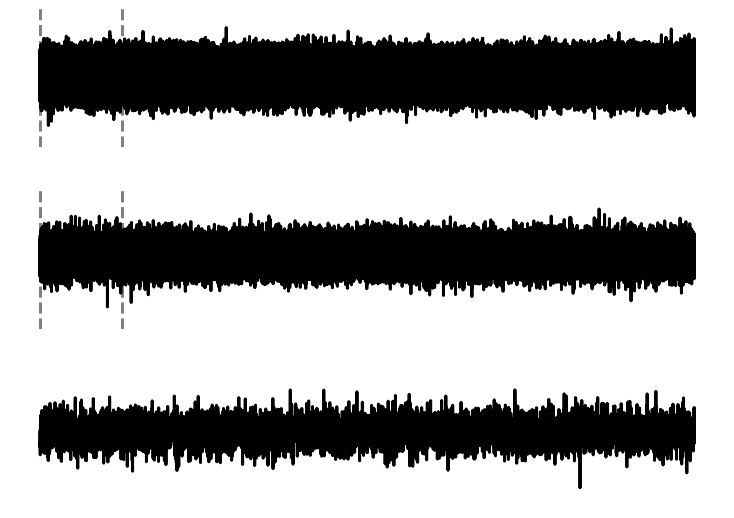

In [336]:
fig, ax = plt.subplots(3, 1, figsize=(10, 7))
ax[0].plot(X, c='black')
lims = ax[0].get_ylim()
lims = (lims[0] * 1.3, lims[1] * 1.3)
ax[0].vlines([0, 2 ** (size-3)], ymin=lims[0], ymax=lims[1], colors='gray', linestyle='--')
ax[0].axis('off')
ax[0].set_ylim(lims)
ax[1].plot(X[:2 ** (size-3)], c='black')
lims = ax[1].get_ylim()
lims = (lims[0] * 1.3, lims[1] * 1.3)
ax[1].vlines([0, 2 ** (size-6)], ymin=lims[0], ymax=lims[1], colors='gray', linestyle='--')
ax[1].set_ylim(lims)
ax[1].axis('off')
ax[2].plot(X[:2 ** (size-6)], c='black')
lims = ax[2].get_ylim()
lims = (lims[0] * 1.3, lims[1] * 1.3)
ax[2].set_ylim(lims)
ax[2].axis('off')
plt.subplots_adjust(hspace=0.3, left=0, right=1, top=1, bottom=0)
plt.savefig('figures/zoom_fbm.pdf')
plt.show()

In [356]:
X = fbm(shape=2 ** 15, H=0.5)

In [357]:
P = psd.welch_estimation(X, 1000)

In [358]:
sns.set_context('poster')

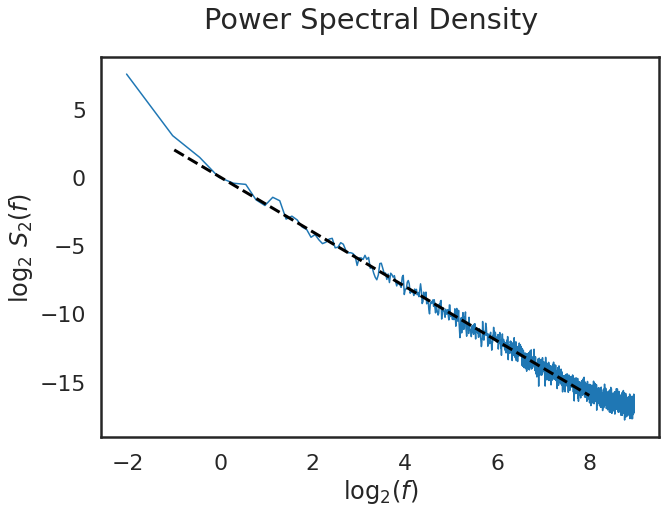

In [359]:
plt.figure(figsize=(10, 7))
psd.log_plot([P.freq], [P.psd])
plt.xlabel(r'$\log_2(f)$')
plt.ylabel(r'$\log_2 \ S_2(f)$')
plt.suptitle('Power Spectral Density')
plt.title('')
plt.savefig('figures/1f.pdf')
plt.plot([-1, 8], (np.array([-1, 8]) * -2.0), c='black', linestyle='--')
plt.show()

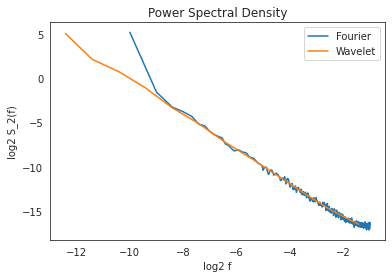

In [158]:
psd.plot_psd(X, 1, n_fft=1024)

In [8]:
from pymultifracs.simul import mrw

In [9]:
size=19

In [87]:
X = np.diff(mrw(shape=2 ** size, H=0.8, lam=0.2, L=2 ** size))

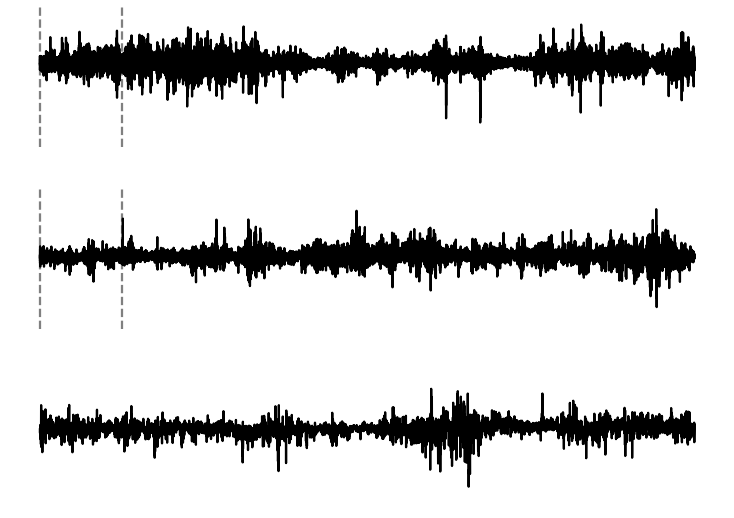

In [88]:
fig, ax = plt.subplots(3, 1, figsize=(10, 7))
ax[0].plot(X, c='black')
lims = ax[0].get_ylim()
lims = (lims[0] * 1.3, lims[1] * 1.3)
ax[0].vlines([0, 2 ** (size-3)], ymin=lims[0], ymax=lims[1], colors='gray', linestyle='--')
ax[0].axis('off')
ax[0].set_ylim(lims)
ax[1].plot(X[:2 ** (size-3)], c='black')
lims = ax[1].get_ylim()
lims = (lims[0] * 1.3, lims[1] * 1.3)
ax[1].vlines([0, 2 ** (size-6)], ymin=lims[0], ymax=lims[1], colors='gray', linestyle='--')
ax[1].set_ylim(lims)
ax[1].axis('off')
ax[2].plot(X[:2 ** (size-6)], c='black')
lims = ax[2].get_ylim()
lims = (lims[0] * 1.3, lims[1] * 1.3)
ax[2].set_ylim(lims)
ax[2].axis('off')
plt.subplots_adjust(hspace=0.3, left=0, right=1, top=1, bottom=0)
plt.savefig('figures/zoom_mrw.pdf')
plt.show()

In [87]:
X = mrw(shape=2 ** 15, H=0.8, lam=0.2, L=2 ** 15)

In [88]:
P = psd.welch_estimation(X, 1000)

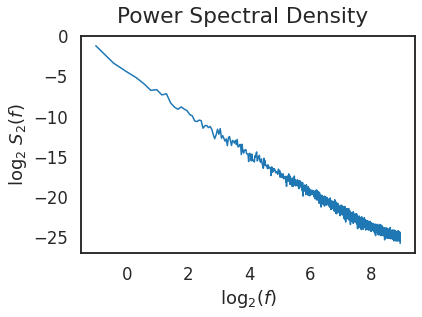

In [95]:
# plt.figure(figsize=(10, 7))
psd.log_plot([P.freq[2:]], [P.psd[2:]])
plt.xlabel(r'$\log_2(f)$')
plt.ylabel(r'$\log_2 \ S_2(f)$')
plt.suptitle('Power Spectral Density')
plt.title('')
plt.savefig('figures/1f_mrw.pdf')
# plt.plot([-1, 8], (np.array([-1, 8]) * -2.0), c='black', linestyle='--')
plt.show()

In [96]:
from pymultifracs.mfa import mf_analysis_full
from pymultifracs.utils import build_q_log

In [97]:
dwt, lwt = mf_analysis_full(X, 3, 12, gamint=0.0, p_exp=2, q=build_q_log(1, 15, 30))

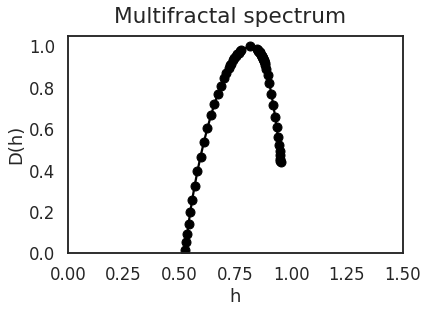

In [98]:
# plt.figure(figsize=(10, 7))
lwt.spectrum.plot()
plt.ylim((0, 1.05))
plt.xlim((0, 1.5))
plt.suptitle('Multifractal spectrum')
plt.title('')
plt.savefig('figures/mfs.pdf')
plt.show()

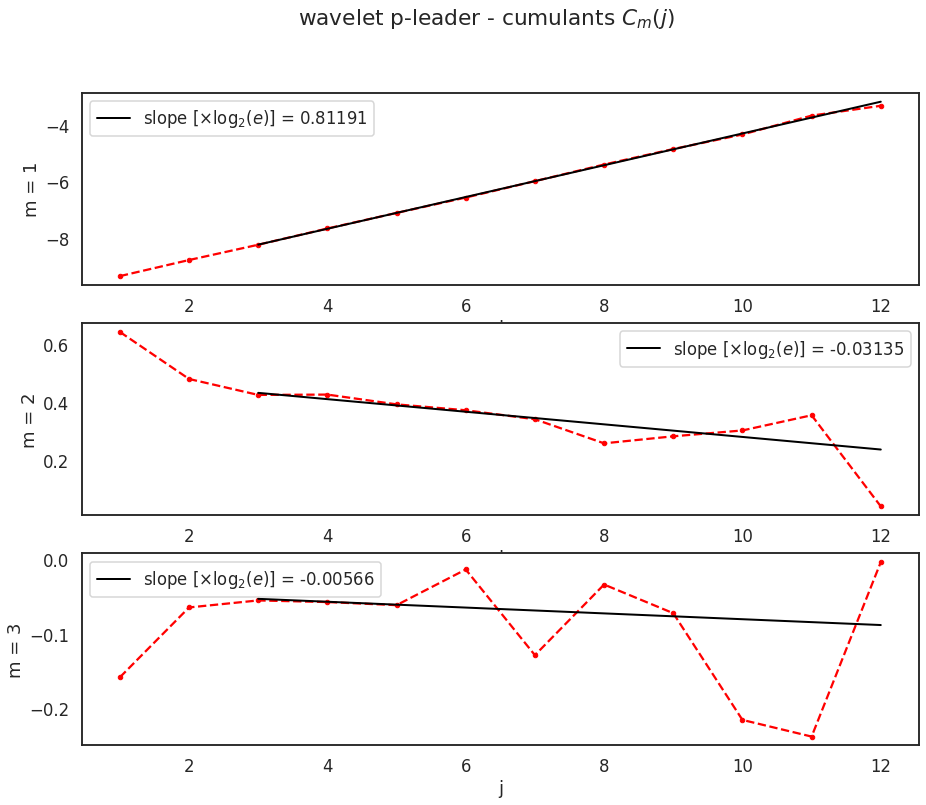

In [30]:
plt.figure(figsize=(15, 12))
lwt.cumulants.plot()
plt.savefig('figures/cumulants.pdf')

In [10]:
palette = sns.color_palette('crest', n_colors=3)

In [161]:
X = [mrw(shape=4096, H=0.8, L=4096, lam=lam) for lam in [0.1, 0.2, 0.3]]

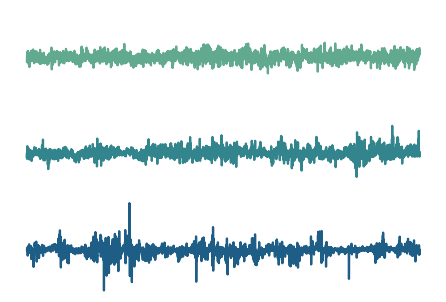

In [162]:
# fig, ax = plt.subplots(3, 1, figsize=(10, 7))
fig, ax = plt.subplots(3, 1)
for i, x in enumerate(X):
    ax[i].plot(np.diff(x), c=palette[i])
    ax[i].axis('off')

plt.subplots_adjust(hspace=0, left=0, right=1, top=1, bottom=0)

lim_l = min([ax[i].get_ylim()[0] for i in range(3)])
lim_h = max([ax[i].get_ylim()[1] for i in range(3)])
lim = (lim_l, lim_h)

ax[0].set_ylim(lim)
ax[1].set_ylim(lim)
ax[2].set_ylim(lim)

plt.savefig('figures/multifractals.pdf')
plt.show()

In [99]:
X = [mrw(shape=2 ** 15, H=0.8, L=2 ** 15, lam=lam) for lam in [0.1, 0.2, 0.3]]

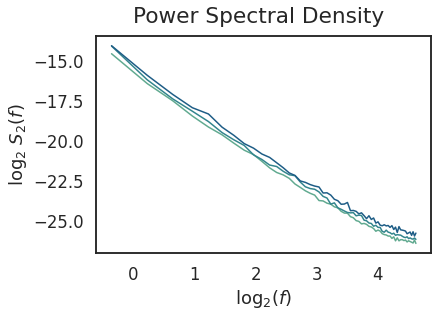

In [100]:
# plt.figure(figsize=(10, 7))
for i, x in enumerate(X):
    P = psd.welch_estimation(x, 50, n_fft=128)
    psd.log_plot([P.freq[2:-1]], [P.psd[2:-1]], color=(palette[i],))
plt.xlabel(r'$\log_2(f)$')
plt.ylabel(r'$\log_2 \ S_2(f)$')
plt.suptitle('Power Spectral Density')
plt.title('')
plt.savefig('figures/PSD_multi.pdf')

In [114]:
X = [mrw(shape=2 ** 15, H=0.8, L=2 ** 15, lam=lam) for lam in [0.1, 0.2, 0.3]]

mf = [mf_analysis_full(x, 3, 12, gamint=0.0, p_exp=2, q=build_q_log(1, 15, 30))[1].spectrum for x in X]

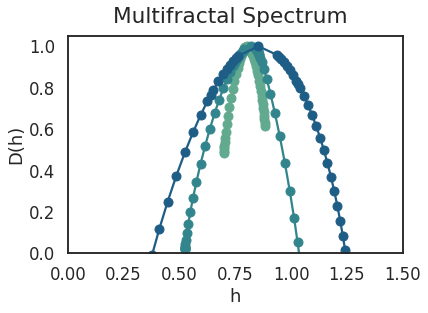

In [116]:
# plt.figure(figsize=(12, 7))
for i, m in enumerate(mf):
    m.plot(color=palette[i])
plt.title('')
plt.suptitle('Multifractal Spectrum')
# for i in range(3):
#     plt.plot(h, D[i, :], color=palette[i])
plt.savefig('figures/mfs_empirical.pdf')

In [71]:
h = np.linspace(0, 1.5, 200)

c2 = np.array([-0.01, -.04, -.09])[:, None]
c1 = 0.8 - c2
D = 1 - (((h - c1) ** 2) / (2 * abs(c2)))

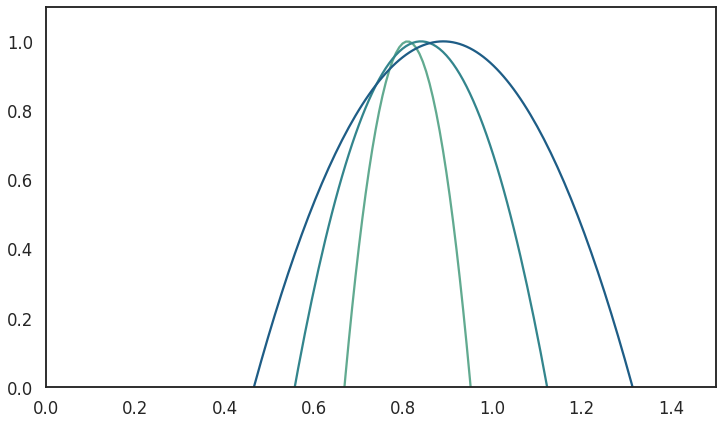

In [77]:
plt.figure(figsize=(12, 7))
for i in range(3):
    plt.plot(h, D[i, :], color=palette[i])
plt.xlim([0, 1.5])
plt.ylim([0, 1.1])
plt.savefig('figures/mfs_theoretical.pdf')

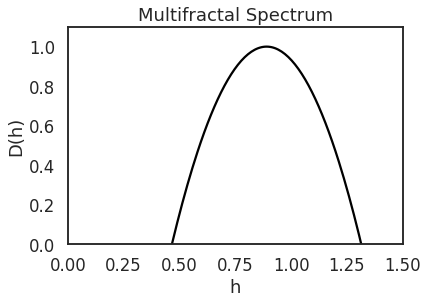

In [164]:
# plt.figure(figsize=(12, 7))
plt.figure()
# for i in range(3):
plt.plot(h, D[2, :], color='black')
plt.xlim([0, 1.5])
plt.ylim([0, 1.1])
plt.title('Multifractal Spectrum')
plt.xlabel('h')
plt.ylabel('D(h)')
plt.savefig('figures/mfs_theoretical.pdf')

In [165]:
dwt, lwt = mf_analysis_full(X[2], 3, 12, gamint=0.0, p_exp=2, q=build_q_log(1, 15, 30))

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:115: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 9
  warnings.warn("Value of j2 is higher than the maximum allowed level. "


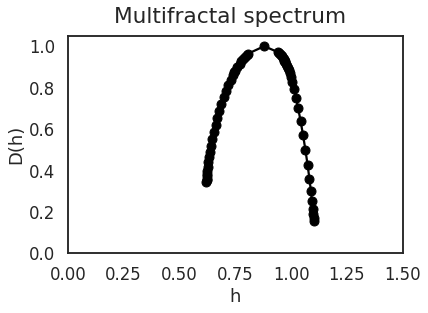

In [166]:
# plt.figure(figsize=(10, 7))
lwt.spectrum.plot()
plt.ylim((0, 1.05))
plt.xlim((0, 1.5))
plt.suptitle('Multifractal spectrum')
plt.title('')
# plt.savefig('figures/mfs.pdf')
plt.show()

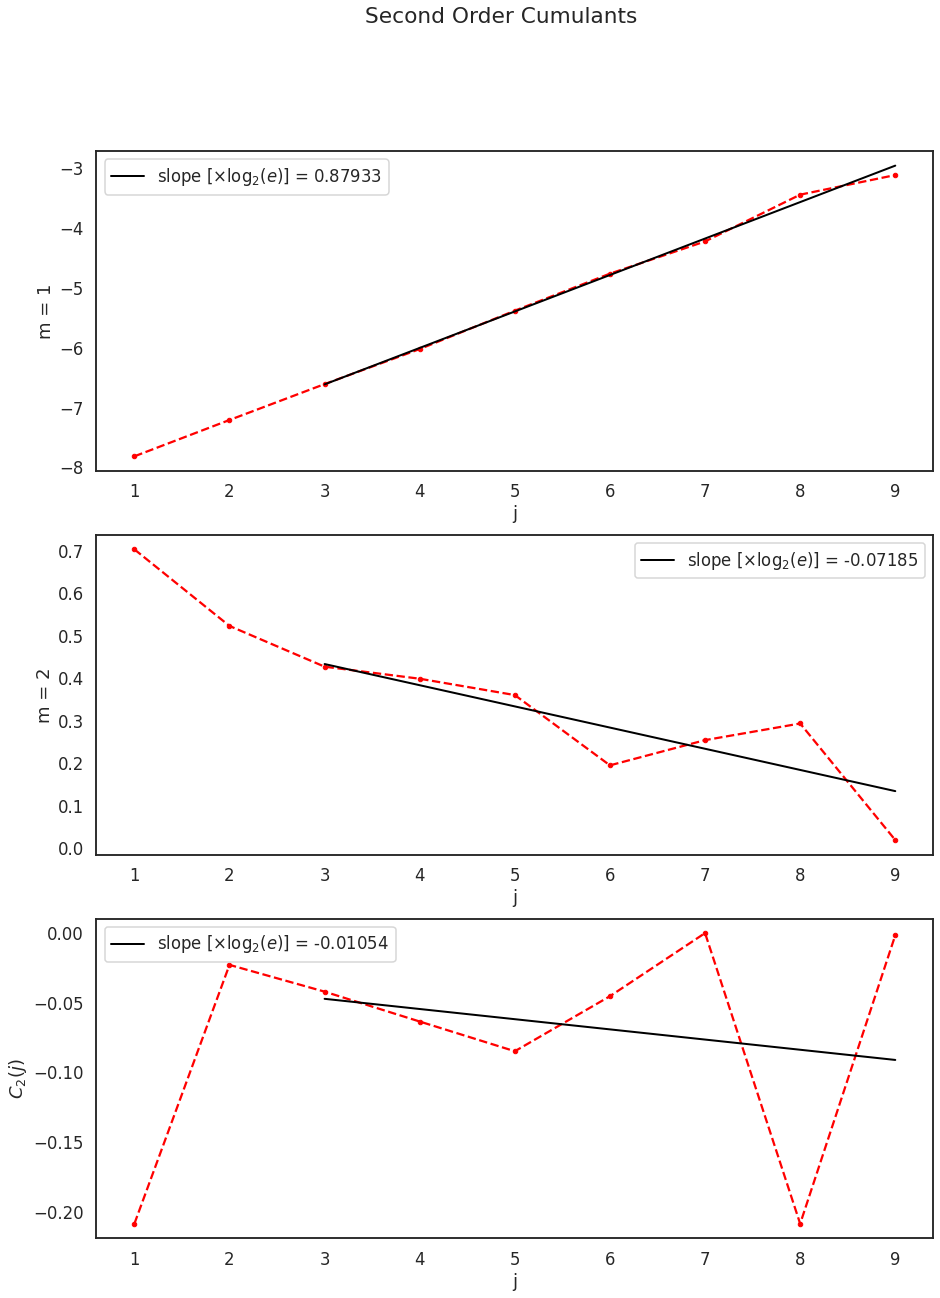

In [175]:
plt.figure(figsize=(15, 20))
lwt.cumulants.plot()
plt.title('')
plt.suptitle('Second Order Cumulants')
plt.gca().set_ylabel('$C_2(j)$')
plt.savefig('figures/cumulants.pdf')

In [177]:
dwt, lwt = mf_analysis_full(X[2], 3, 12, gamint=0.0, p_exp=2)

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:115: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 9
  warnings.warn("Value of j2 is higher than the maximum allowed level. "


In [ ]:
# plt.figure(figsize=(, 20))
dwt.structure.plot(figsize=(15, 6))
plt.title('')
plt.suptitle('Power Spectral Density')
# plt.gca().set_ylabel('$C_2(j)$')
plt.ylabel('$\log_2 \ S_2(j)$')
plt.savefig('figures/structure.pdf')